In [1]:
import time
start_eda = time.time()

In [2]:
# libraries for dataframe
import pandas as pd
import numpy as np
from datetime import datetime

# libraries for visulisation
import matplotlib.pyplot as plt
import seaborn as sns
#import plotly.express as px
%matplotlib inline
sns.set_style('darkgrid')
sns.set_palette('Set1')

# label encoder
from sklearn.preprocessing import LabelEncoder


# machine learning libraries
from sklearn import preprocessing
from sklearn.metrics import roc_auc_score



# library to ignore warnings
import warnings

warnings.filterwarnings('ignore')

# resetting the column-rows defult display option
pd.options.display.max_columns = 200
pd.options.display.max_rows = 500

In [3]:
 # Importing accepted dataset in csv format as the data received is in .txt format and then converted to excel.
accepted_df = pd.read_csv('accepted.csv')

In [4]:
# Checking the number of observations and number of variables in the dataset
accepted_df.shape

(2260701, 151)

In [5]:
# checking the data description
accepted_df.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2260701 entries, 0 to 2260700
Data columns (total 151 columns):
 #    Column                                      Non-Null Count    Dtype  
---   ------                                      --------------    -----  
 0    id                                          2260701 non-null  object 
 1    member_id                                   0 non-null        float64
 2    loan_amnt                                   2260668 non-null  float64
 3    funded_amnt                                 2260668 non-null  float64
 4    funded_amnt_inv                             2260668 non-null  float64
 5    term                                        2260668 non-null  object 
 6    int_rate                                    2260668 non-null  float64
 7    installment                                 2260668 non-null  float64
 8    grade                                       2260668 non-null  object 
 9    sub_grade                                   

In [6]:
# checking the number of numerical and categorical features
num_vars = accepted_df.columns[accepted_df.dtypes != 'object']
cat_vars = accepted_df.columns[accepted_df.dtypes == 'object']
print("number of numerical variables :",len(num_vars))
print("number of categorical variable :",len(cat_vars))

number of numerical variables : 113
number of categorical variable : 38


# Exploratory Data Analysis

In [7]:
# checking the top 10 rows 
accepted_df.head(10)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,fico_range_low,fico_range_high,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_fico_range_low,sec_app_fico_range_high,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,68407277,NaN,3600.0,3600.0,3600.0,36 months,13.99,123.03,C,C4,leadman,10+ years,MORTGAGE,55000.0,Not Verified,Dec-2015,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,debt_consolidation,Debt consolidation,190xx,PA,5.91,0.0,Aug-2003,675.0,679.0,1.0,30.0,NaN,7.0,0.0,2765.0,29.7,13.0,w,0.00,0.00,4421.723917,4421.72,3600.00,821.72,0.0,0.0,0.0,Jan-2019,122.67,NaN,Mar-2019,564.0,560.0,0.0,30.0,1.0,Individual,NaN,NaN,NaN,0.0,722.0,144904.0,2.0,2.0,0.0,1.0,21.0,4981.0,36.0,3.0,3.0,722.0,34.0,9300.0,3.0,1.0,4.0,4.0,20701.0,1506.0,37.2,0.0,0.0,148.0,128.0,3.0,3.0,1.0,4.0,69.0,4.0,69.0,2.0,2.0,4.0,2.0,5.0,3.0,4.0,9.0,4.0,7.0,0.0,0.0,0.0,3.0,76.9,0.0,0.0,0.0,178050.0,7746.0,2400.0,13734.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
1,68355089,NaN,24700.0,24700.0,24700.0,36 months,11.99,820.28,C,C1,Engineer,10+ years,MORTGAGE,65000.0,Not Verified,Dec-2015,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,Business,577xx,SD,16.06,1.0,Dec-1999,715.0,719.0,4.0,6.0,NaN,22.0,0.0,21470.0,19.2,38.0,w,0.00,0.00,25679.660000,25679.66,24700.00,979.66,0.0,0.0,0.0,Jun-2016,926.35,NaN,Mar-2019,699.0,695.0,0.0,NaN,1.0,Individual,NaN,NaN,NaN,0.0,0.0,204396.0,1.0,1.0,0.0,1.0,19.0,18005.0,73.0,2.0,3.0,6472.0,29.0,111800.0,0.0,0.0,6.0,4.0,9733.0,57830.0,27.1,0.0,0.0,113.0,192.0,2.0,2.0,4.0,2.0,NaN,0.0,6.0,0.0,5.0,5.0,13.0,17.0,6.0,20.0,27.0,5.0,22.0,0.0,0.0,0.0,2.0,97.4,7.7,0.0,0.0,314017.0,39475.0,79300.0,24667.0,NaN,NaN,NaN,NaN,NaN,N

feature like **id, member_id and url** does not hold any meaningful information. so dropping these columns would not affect the predction result

In [8]:
# dropping the columns
accepted_df.drop(columns=['id','member_id','url'], inplace=True, axis=1)

In [9]:
# rechecking the columns
accepted_df.shape

(2260701, 148)

## Data Cleaning

**target feature analysis**

In [10]:
# checking the target column
accepted_df['loan_status'].value_counts()

Fully Paid                                             1076751
Current                                                 878317
Charged Off                                             268559
Late (31-120 days)                                       21467
In Grace Period                                           8436
Late (16-30 days)                                         4349
Does not meet the credit policy. Status:Fully Paid        1988
Does not meet the credit policy. Status:Charged Off        761
Default                                                     40
Name: loan_status, dtype: int64

the label **Fully Paid** shows the status of non-default account who has paid all their debts. and the labels **Charged Off and Default** shows the status of default account who are not able to clear their debts. other class labels holds the other information about currently active account and some in grace period and late. these class labels are not required for the learning so dropping these class label will help in further learning

In [11]:
# Taking only required loans status:

accepted_df = accepted_df.loc[accepted_df['loan_status'].isin(['Fully Paid','Charged Off','Default',])]

# reseting the index
accepted_df.reset_index(drop=True,inplace=True)

# rechecking the value counts of the target column
accepted_df['loan_status'].value_counts()

Fully Paid     1076751
Charged Off     268559
Default             40
Name: loan_status, dtype: int64

creating a new column **target** for the default as 1 and non-default as 0

In [12]:
target = [0 if i=='Fully Paid' else 1 for i in accepted_df['loan_status']]
accepted_df['target'] = target
accepted_df['target'].value_counts()

0    1076751
1     268599
Name: target, dtype: int64

In [13]:
# dropping the loan_status column
accepted_df.drop('loan_status', inplace=True, axis=1)

In [14]:
accepted_df.shape

(1345350, 148)

In [15]:
accepted_df.target.value_counts(normalize=True)*100

0    80.035009
1    19.964991
Name: target, dtype: float64

the class label of target feature is not distributed equally they are highly imbalanced. the imbalance ratio between non-default and default is almost 4:1 which is very high

<font color='maroon'><b> the class label of target feature is not balanced</font>

**application_type feature analysis**

the other important feature is **application_type**, which needs to be explored for better learning

In [16]:
# checking the class labels of application_type
accepted_df.application_type.value_counts()

Individual    1319544
Joint App       25806
Name: application_type, dtype: int64

the application_type holds information about is the applicant type individual or joint. for each applicant type different information needed for credit assessment hence they both need deferent feature information. for eg for indiviadual type required informations are fico score, dti, annual income and so on and for joint applicant required informations are fico score for first applicant and fico score for second applicant, dti for first applicant and for second applicant, annual income for first applicant and for second applicant and so on. so for some of the feature for individaul is null which is only applicable for joint and vice versa. so creating two different dataset will help creating accurate prediction for each dataset

In [17]:
# Creating new dataframe for individual account type 

individual_df=accepted_df[accepted_df['application_type']=='Individual']


print('Shape of individual dataframe',individual_df.shape)

# reseting the index of individual dataframe

individual_df.reset_index(drop=True,inplace=True)

Shape of individual dataframe (1319544, 148)


In [18]:
# creating new df for joint account type 
joint_app_df=accepted_df[accepted_df['application_type']=='Joint App']


print('Shape of Joint dataframe',joint_app_df.shape)

# reseting the index of joint dataframe

joint_app_df.reset_index(drop=True,inplace=True)

Shape of Joint dataframe (25806, 148)


### Handling the null values

**for individual dataframe**

In [19]:
# checking the null value %
((individual_df.isnull().sum()/len(individual_df))*100).sort_values(ascending=False)

annual_inc_joint                              100.000000
sec_app_mths_since_last_major_derog           100.000000
verification_status_joint                     100.000000
dti_joint                                     100.000000
revol_bal_joint                               100.000000
sec_app_fico_range_low                        100.000000
sec_app_fico_range_high                       100.000000
sec_app_inq_last_6mths                        100.000000
sec_app_mort_acc                              100.000000
sec_app_open_acc                              100.000000
sec_app_revol_util                            100.000000
sec_app_open_act_il                           100.000000
sec_app_num_rev_accts                         100.000000
sec_app_chargeoff_within_12_mths              100.000000
sec_app_collections_12_mths_ex_med            100.000000
sec_app_earliest_cr_line                      100.000000
next_pymnt_d                                   99.997423
orig_projected_additional_accru

In [20]:
 individual_df.home_ownership.value_counts()

MORTGAGE    648122
RENT        528522
OWN         142424
ANY            286
OTHER          144
NONE            46
Name: home_ownership, dtype: int64

In [21]:
# Replacing the missing values in the data which is present as NONE.
individual_df=individual_df.replace('NONE', np.nan)


In [22]:
# storing the null value % column wise for individual_df into new dataframe

null_data_ind_info = pd.DataFrame(
    ((individual_df.isnull().sum()) / len(individual_df)) * 100)
null_data_ind_info.reset_index(inplace=True)
null_data_ind_info.rename(columns={
    'index': 'Columns',
    0: 'Null_value'
},
                      inplace=True)
null_data_ind_info.sort_values('Null_value',ascending=False).reset_index(drop=True)

,Columns,Null_value
0,annual_inc_joint,100.000000
1,sec_app_mths_since_last_major_derog,100.000000
2,verification_status_joint,100.000000
3,dti_joint,100.000000
4,revol_bal_joint,100.000000
5,sec_app_fico_range_low,100.000000
6,sec_app_fico_range_high,100.000000
7,sec_app_earliest_cr_line,100.000000
8,sec_app_mort_acc,100.000000
9,sec_app_open_acc,100.000000


In [23]:
# creating a new dataframe accepted_reduced_df where only column with less than 40% null value are present
less_null_columns = list(
    null_data_ind_info[null_data_ind_info.Null_value <= 40].Columns)
individual_df = individual_df[less_null_columns]

In [24]:
# craeting column list for only null value holder for individual_df
only_null_column_ind = list(
    null_data_ind_info[(null_data_ind_info.Null_value <= 40) & (null_data_ind_info.Null_value >0)].Columns)
len(only_null_column_ind)

47

In [25]:
# Separating the Numerical/Date-Time variables and the Categorical variables for individual dataset.
num_ind_vars = individual_df.columns[individual_df.dtypes != 'object']
cat_ind_vars = individual_df.columns[individual_df.dtypes == 'object']


In [26]:
# seperating the numerical feature and categorical feature from null value holder column
num_null_cols_ind=[]
cat_nul_cols_ind=[]
for i in only_null_column_ind:
    if i in num_ind_vars:
        num_null_cols_ind.append(i)
    elif i in cat_ind_vars:
        cat_nul_cols_ind.append(i)
print("number of numerical feature for null values : ",len(num_null_cols_ind))
print("number of categorical feature for null values : ",len(cat_nul_cols_ind))

number of numerical feature for null values :  40
number of categorical feature for null values :  7


In [27]:
# rechecking the shape of the individual_df
print("shape of the individual_df :",individual_df.shape)

# rechecking the null value %
((individual_df.isnull().sum()/len(individual_df))*100).sort_values(ascending=False)

shape of the individual_df : (1319544, 91)


mths_since_recent_inq         13.004038
num_tl_120dpd_2m               8.897164
mo_sin_old_il_acct             7.943199
emp_title                      6.211388
emp_length                     5.666200
pct_tl_nvr_dlq                 5.129120
avg_cur_bal                    5.118890
num_rev_accts                  5.117525
mo_sin_rcnt_rev_tl_op          5.117525
mo_sin_old_rev_tl_op           5.117525
mo_sin_rcnt_tl                 5.117450
num_accts_ever_120_pd          5.117450
num_actv_bc_tl                 5.117450
num_actv_rev_tl                5.117450
num_bc_tl                      5.117450
tot_coll_amt                   5.117450
num_il_tl                      5.117450
num_op_rev_tl                  5.117450
total_rev_hi_lim               5.117450
num_rev_tl_bal_gt_0            5.117450
tot_cur_bal                    5.117450
num_tl_30dpd                   5.117450
num_tl_90g_dpd_24m             5.117450
num_tl_op_past_12m             5.117450
total_il_high_credit_limit     5.117450


handling null values required to analyze each features and then will decide wheather to impute the null values or drop those rows or column. features **num_tl_120dpd_2m and tot_coll_amt** have **99.92% and 84.67% class label** as 0.0. both features are highly skewed and imputation of null value for them will not add meaning to this feature so lets drop this column to handel the null value

Class Lable % for feature num_tl_120dpd_2m :
 0.0    99.921058
1.0     0.075532
2.0     0.002911
3.0     0.000333
4.0     0.000083
6.0     0.000083
Name: num_tl_120dpd_2m, dtype: float64


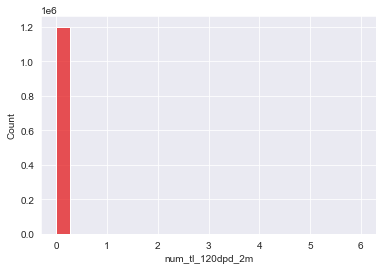

Class Lable % for feature tot_coll_amt :
 0.0        84.668739
50.0        0.199518
100.0       0.164455
75.0        0.122602
150.0       0.092091
             ...    
5996.0      0.000080
42817.0     0.000080
7990.0      0.000080
13562.0     0.000080
39154.0     0.000080
Name: tot_coll_amt, Length: 12801, dtype: float64


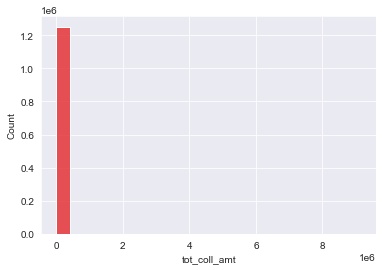

In [28]:
print('Class Lable % for feature num_tl_120dpd_2m :\n',individual_df.num_tl_120dpd_2m.value_counts(normalize=True)*100)
sns.histplot(individual_df.num_tl_120dpd_2m)
plt.show()

print('Class Lable % for feature tot_coll_amt :\n',individual_df.tot_coll_amt.value_counts(normalize=True)*100)
sns.histplot(individual_df.tot_coll_amt)
plt.show()

In [29]:
# dropping columns num_tl_120dpd_2m and tot_coll_amt for null value handling 
individual_df.drop(columns=['num_tl_120dpd_2m' ,'tot_coll_amt'],inplace=True,axis=1)

In [30]:
# rechecking the shape of individual_df
individual_df.shape

(1319544, 89)

In [31]:
# removing the dropped features from numerical feature list for null values
num_null_cols_ind.remove('num_tl_120dpd_2m')
num_null_cols_ind.remove('tot_coll_amt')

# rechecking the length of numerical feature list
len(num_null_cols_ind)

38

In [32]:
# Replacing the missing values with mean for numerical variables for individual data.
for value in num_null_cols_ind:
    individual_df[value].fillna(round(individual_df[value].mean(),0),inplace=True)

In [33]:
# Replacing the missing values with mode for categorical variables for individual data.
for value in cat_nul_cols_ind:
    individual_df[value].fillna(individual_df[value].mode()[0],inplace=True)

In [34]:
# rechecking the shape of the individual_df
print("shape of the individual_df :",individual_df.shape)

# rechecking the null value %
((individual_df.isnull().sum()/len(individual_df))*100).sort_values(ascending=False)

shape of the individual_df : (1319544, 89)


loan_amnt                     0.0
collections_12_mths_ex_med    0.0
num_actv_bc_tl                0.0
num_accts_ever_120_pd         0.0
mths_since_recent_inq         0.0
mths_since_recent_bc          0.0
mort_acc                      0.0
mo_sin_rcnt_tl                0.0
mo_sin_rcnt_rev_tl_op         0.0
mo_sin_old_rev_tl_op          0.0
mo_sin_old_il_acct            0.0
delinq_amnt                   0.0
chargeoff_within_12_mths      0.0
bc_util                       0.0
bc_open_to_buy                0.0
avg_cur_bal                   0.0
acc_open_past_24mths          0.0
total_rev_hi_lim              0.0
tot_cur_bal                   0.0
acc_now_delinq                0.0
application_type              0.0
num_actv_rev_tl               0.0
num_bc_sats                   0.0
num_bc_tl                     0.0
pub_rec_bankruptcies          0.0
debt_settlement_flag          0.0
disbursement_method           0.0
hardship_flag                 0.0
total_il_high_credit_limit    0.0
total_bc_limit

**All null values for individual_df is successfully handled**

**for joint dataframe**

In [35]:
# checking the null value % for joint dataframe
((joint_app_df.isnull().sum()/len(joint_app_df))*100).sort_values(ascending=False)

desc                                          100.000000
next_pymnt_d                                   99.976750
orig_projected_additional_accrued_interest     99.674494
hardship_type                                  99.337363
hardship_reason                                99.337363
hardship_status                                99.337363
deferral_term                                  99.337363
hardship_amount                                99.337363
hardship_end_date                              99.337363
payment_plan_start_date                        99.337363
hardship_length                                99.337363
hardship_dpd                                   99.337363
hardship_loan_status                           99.337363
hardship_start_date                            99.337363
hardship_payoff_balance_amount                 99.337363
hardship_last_payment_amount                   99.337363
debt_settlement_flag_date                      97.690460
settlement_percentage          

In [36]:
# storing the null value % column wise for joint_df into new dataframe

null_data_joint_info = pd.DataFrame(
    ((joint_app_df.isnull().sum()) / len(joint_app_df)) * 100)
null_data_joint_info.reset_index(inplace=True)
null_data_joint_info.rename(columns={
    'index': 'Columns',
    0: 'Null_value'
},
                      inplace=True)
null_data_joint_info.sort_values('Null_value',ascending=False).reset_index(drop=True)

,Columns,Null_value
0,desc,100.000000
1,next_pymnt_d,99.976750
2,orig_projected_additional_accrued_interest,99.674494
3,hardship_type,99.337363
4,hardship_reason,99.337363
5,hardship_status,99.337363
6,deferral_term,99.337363
7,hardship_amount,99.337363
8,hardship_end_date,99.337363
9,payment_plan_start_date,99.337363


In [37]:
# dropping the columns where null value % is more than 40%
less_null_columns_joint = list(
    null_data_joint_info[null_data_joint_info.Null_value <= 40].Columns)
joint_app_df = joint_app_df[less_null_columns_joint]

In [38]:
# craeting column list for only null value holder for individual_df
only_null_column_jnt = list(
    null_data_joint_info[(null_data_joint_info.Null_value <= 40) & (null_data_joint_info.Null_value >0)].Columns)
len(only_null_column_jnt)

43

In [39]:
# rechecking the shape of joint_app_df
print("shape of joint dataframe",joint_app_df.shape)

# rechecking the null value % for joint dataframe
((joint_app_df.isnull().sum()/len(joint_app_df))*100).sort_values(ascending=False)

shape of joint dataframe (25806, 120)


sec_app_revol_util                    29.055258
revol_bal_joint                       27.788111
sec_app_fico_range_low                27.784236
sec_app_fico_range_high               27.784236
sec_app_earliest_cr_line              27.784236
sec_app_inq_last_6mths                27.784236
sec_app_mort_acc                      27.784236
sec_app_open_acc                      27.784236
sec_app_open_act_il                   27.784236
sec_app_num_rev_accts                 27.784236
sec_app_chargeoff_within_12_mths      27.784236
sec_app_collections_12_mths_ex_med    27.784236
il_util                               17.306053
emp_title                             14.837635
emp_length                            14.523754
mths_since_recent_inq                  9.606293
mths_since_rcnt_il                     3.999070
mo_sin_old_il_acct                     2.952802
bc_util                                2.421917
title                                  2.371542
percent_bc_gt_75                       2

In [40]:
# Separating the Numerical/Date-Time variables and the Categorical variables for individual dataset.
num_jnt_vars = joint_app_df.columns[joint_app_df.dtypes != 'object']
cat_jnt_vars = joint_app_df.columns[joint_app_df.dtypes == 'object']


In [41]:
# seperating the numerical feature and categorical feature from null value holder column
num_null_cols_jnt=[]
cat_nul_cols_jnt=[]
for i in only_null_column_jnt:
    if i in num_jnt_vars:
        num_null_cols_jnt.append(i)
    elif i in cat_jnt_vars:
        cat_nul_cols_jnt.append(i)
print("number of numerical feature for null values : ",len(num_null_cols_jnt))
print("number of categorical feature for null values : ",len(cat_nul_cols_jnt))

number of numerical feature for null values :  36
number of categorical feature for null values :  7


Class Lable % for feature num_tl_120dpd_2m :
 0.0    99.972873
1.0     0.027127
Name: num_tl_120dpd_2m, dtype: float64


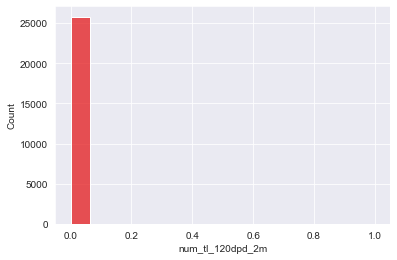

In [42]:
print('Class Lable % for feature num_tl_120dpd_2m :\n',joint_app_df.num_tl_120dpd_2m.value_counts(normalize=True)*100)
sns.histplot(joint_app_df.num_tl_120dpd_2m)
plt.show()

In [43]:
# dropping the skewed column num_tl_120dpd_2m from joint_df
joint_app_df.drop('num_tl_120dpd_2m',axis=1,inplace=True)

# rechecking the shape of joint_app_df
joint_app_df.shape

(25806, 119)

In [44]:
# removing the skewed from numerical feature list
num_null_cols_jnt.remove('num_tl_120dpd_2m')

In [45]:
# Replacing the missing values with mean for numerical variables for individual data.
for value in num_null_cols_jnt:
    joint_app_df[value].fillna(round(joint_app_df[value].mean(),0),inplace=True)
    
# Replacing the missing values with mode for categorical variables for individual data.
for value in cat_nul_cols_jnt:
    joint_app_df[value].fillna(joint_app_df[value].mode()[0],inplace=True)

# rechecking the shape of the individual_df
print("shape of the joint applicant :",joint_app_df.shape)

# rechecking the null value %
((joint_app_df.isnull().sum()/len(joint_app_df))*100).sort_values(ascending=False)

shape of the joint applicant : (25806, 119)


loan_amnt                             0.0
mo_sin_old_il_acct                    0.0
num_il_tl                             0.0
num_bc_tl                             0.0
num_bc_sats                           0.0
num_actv_rev_tl                       0.0
num_actv_bc_tl                        0.0
num_accts_ever_120_pd                 0.0
mths_since_recent_inq                 0.0
mths_since_recent_bc                  0.0
mort_acc                              0.0
mo_sin_rcnt_tl                        0.0
mo_sin_rcnt_rev_tl_op                 0.0
mo_sin_old_rev_tl_op                  0.0
delinq_amnt                           0.0
num_rev_accts                         0.0
chargeoff_within_12_mths              0.0
bc_util                               0.0
bc_open_to_buy                        0.0
avg_cur_bal                           0.0
acc_open_past_24mths                  0.0
inq_last_12m                          0.0
total_cu_tl                           0.0
inq_fi                            

**All null values are successfully handled**

### Outlier Handling

**for individual dataframe**

In [46]:
individual_df.kurtosis(axis=0).sort_values(ascending=False)

out_prncp_inv                 113671.800868
out_prncp                     113671.800868
delinq_amnt                    13874.180211
total_rev_hi_lim               13766.779671
annual_inc                      4791.691076
tax_liens                       3658.242797
acc_now_delinq                  1218.869506
total_rec_late_fee               841.760456
pub_rec                          748.714903
revol_bal                        727.337216
collections_12_mths_ex_med       696.442491
chargeoff_within_12_mths         593.385735
num_tl_30dpd                     579.282968
num_tl_90g_dpd_24m               324.565559
collection_recovery_fee          135.284107
tot_hi_cred_lim                  123.118505
recoveries                       119.250921
total_bal_ex_mort                 81.429079
delinq_2yrs                       58.537840
avg_cur_bal                       48.608226
num_accts_ever_120_pd             45.608061
mo_sin_rcnt_tl                    40.754338
total_il_high_credit_limit      

In [47]:
numerical_feature_ind=individual_df.columns[individual_df.dtypes != 'object']
len(numerical_feature_ind)

68

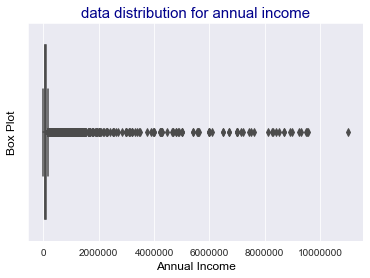

Distribution for Annual Income


count    1.319544e+06
mean     7.660993e+04
std      7.033572e+04
min      2.000000e+03
25%      4.600000e+04
50%      6.500000e+04
75%      9.075625e+04
90%      1.250000e+05
95%      1.560000e+05
99%      2.550000e+05
100%     1.099920e+07
max      1.099920e+07
Name: annual_inc, dtype: float64

In [48]:
sns.boxplot(individual_df['annual_inc'])
plt.ticklabel_format(axis="x", style="plain",)
plt.title("data distribution for annual income",
         fontdict={'color': 'darkblue','fontsize': 15})
plt.xlabel('Annual Income',fontdict={'color': 'black','fontsize': 12})
plt.ylabel('Box Plot',fontdict={'color': 'black','fontsize': 12})
plt.show()
print( '\033[1m'+'Distribution for Annual Income'+'\033[0m')

individual_df.annual_inc.describe(percentiles=(0.25,0.5,0.75,0.9,0.95,0.99,1))

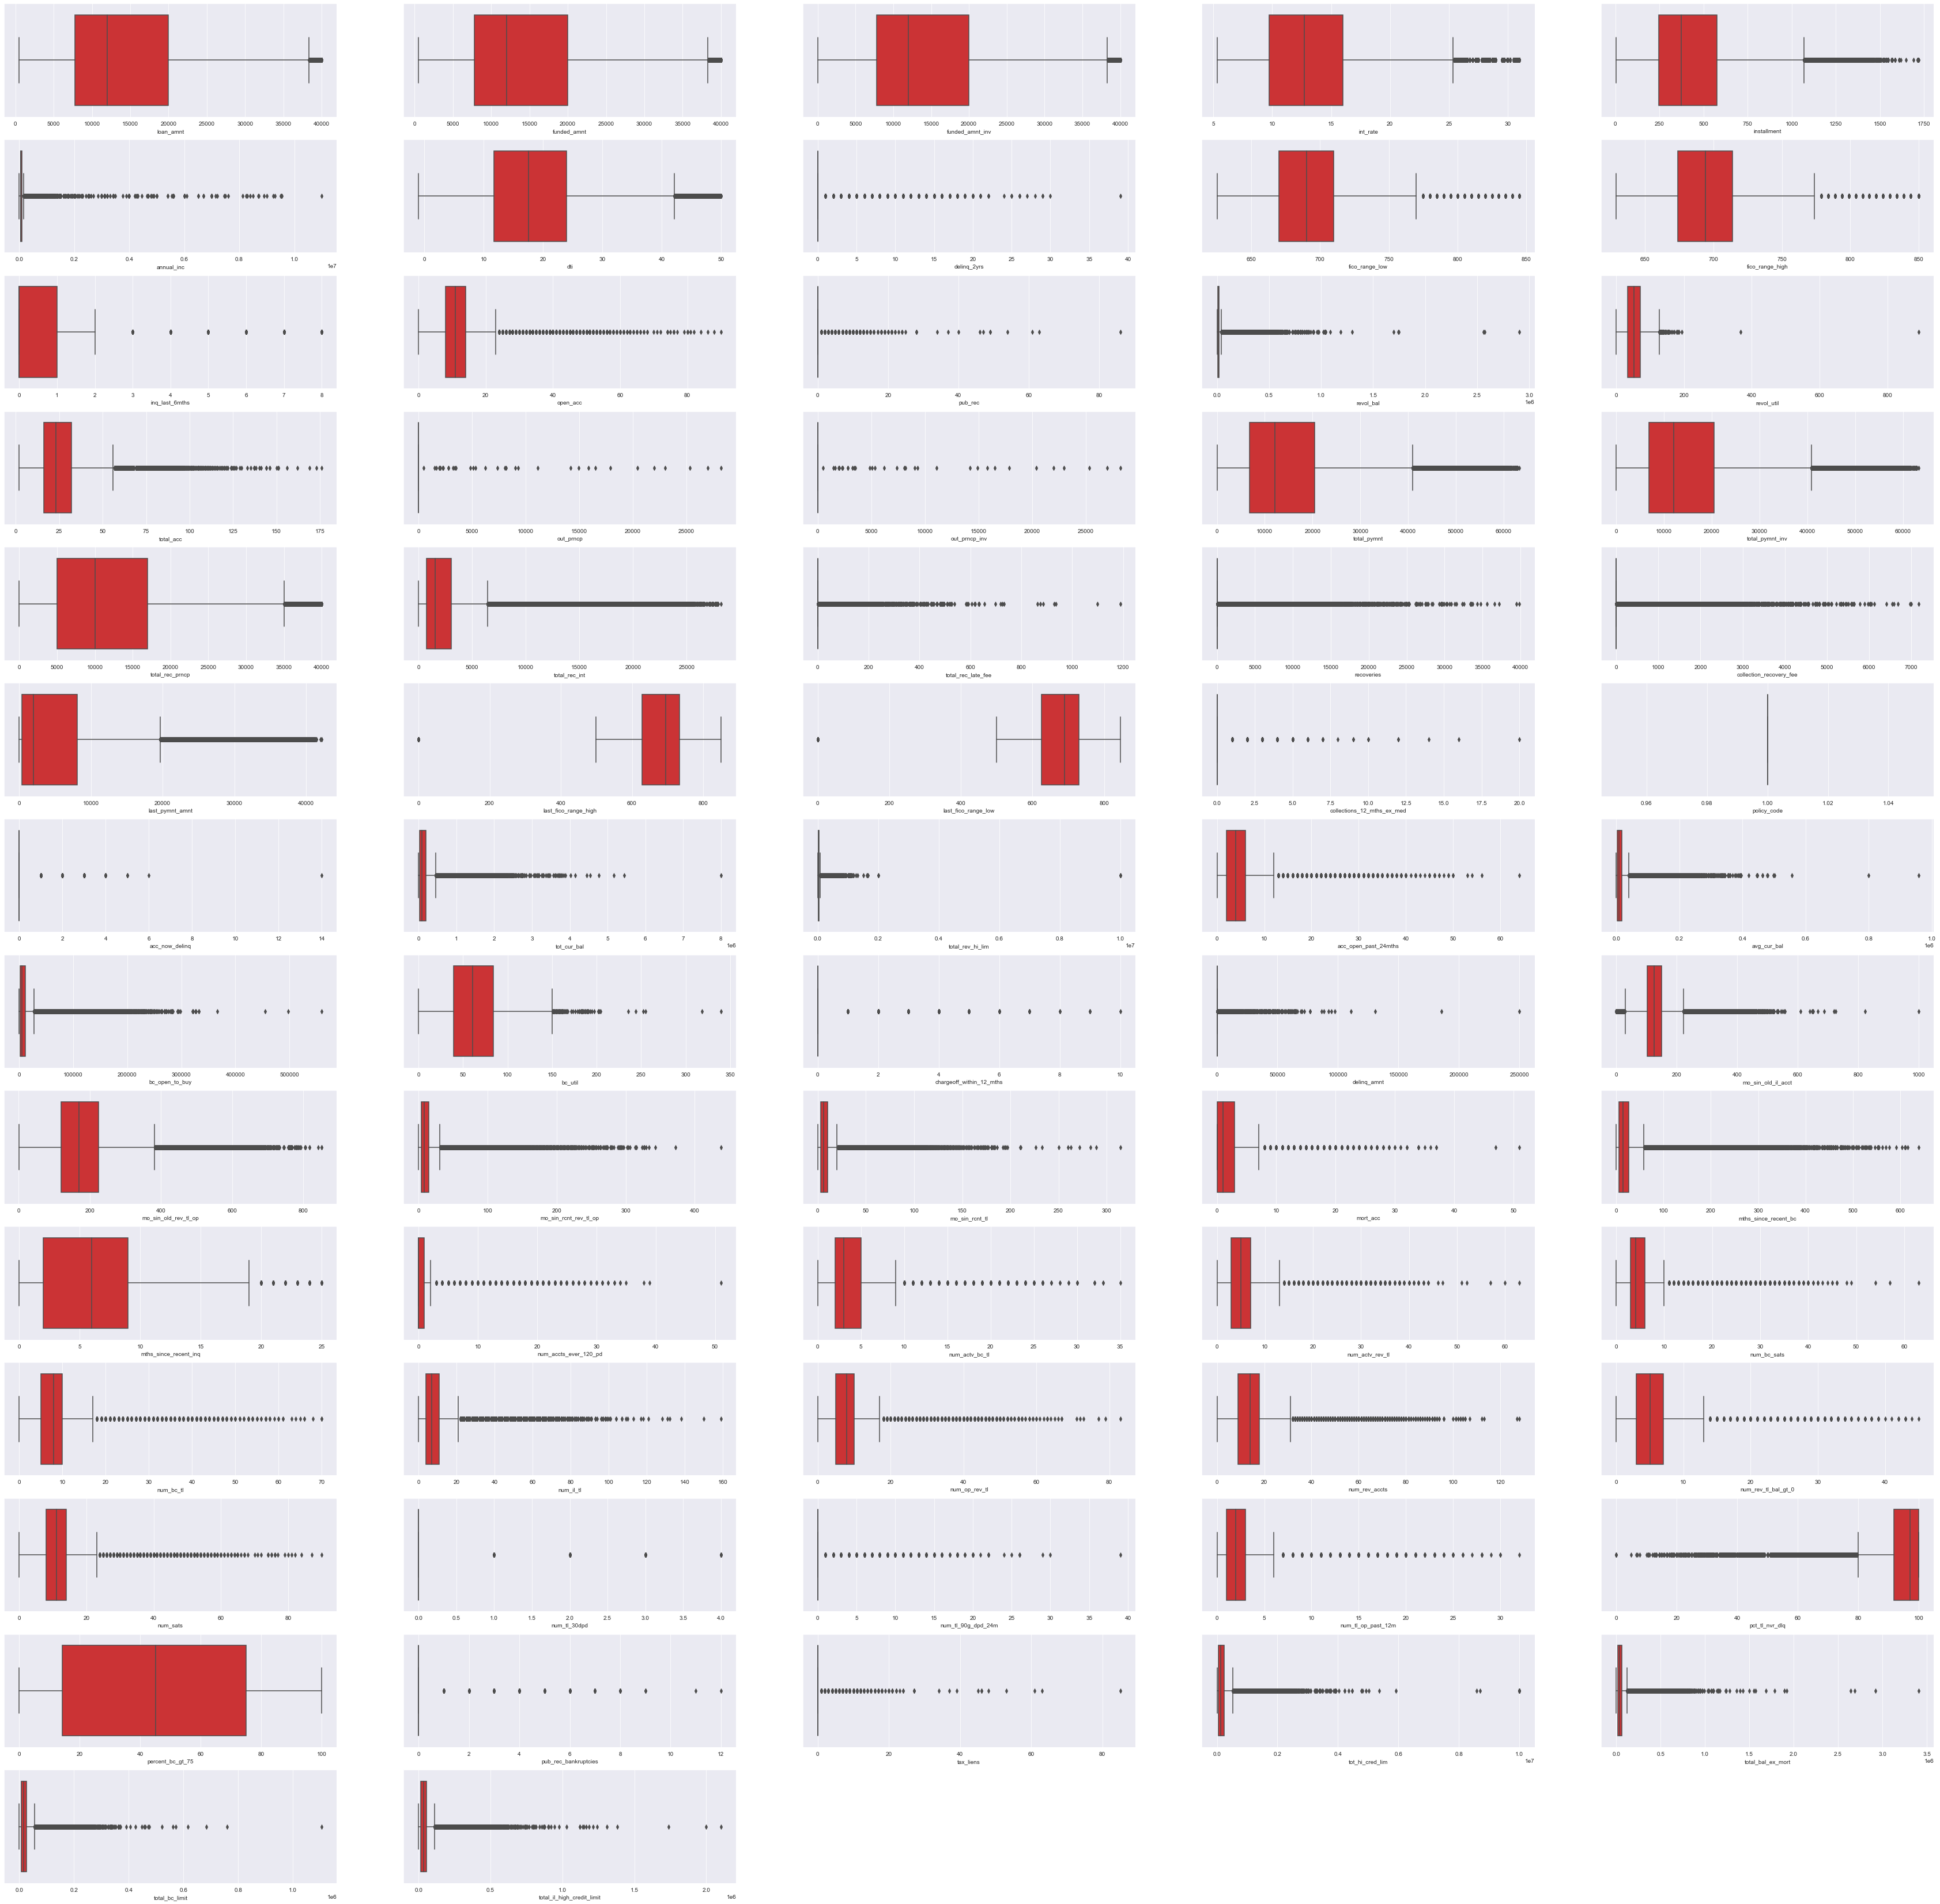

In [49]:
# plotting boxplot
plt.figure(figsize=(60, 60))
i, j = 14,5
for k in range(1, 68):
    plt.subplot(i, j, k)
    sns.boxplot(individual_df[numerical_feature_ind[k - 1]])

boxplot of features **chargeoff_within_12_mths, collections_12_mths_ex_med, pub_rec_bankruptcies, tax_liens, num_tl_90g_dpd_24m, num_tl_30dpd, acc_now_delinq, policy_code, collection_recovery_fee, pub_rec ,delinq_2yrs, out_prncp, out_prncp_inv and delinq_amnt** has outlier with a single line this shows that these features may be skewed towards single class lable. plotiing histogram for these features will help in identifying the class distribution for them.

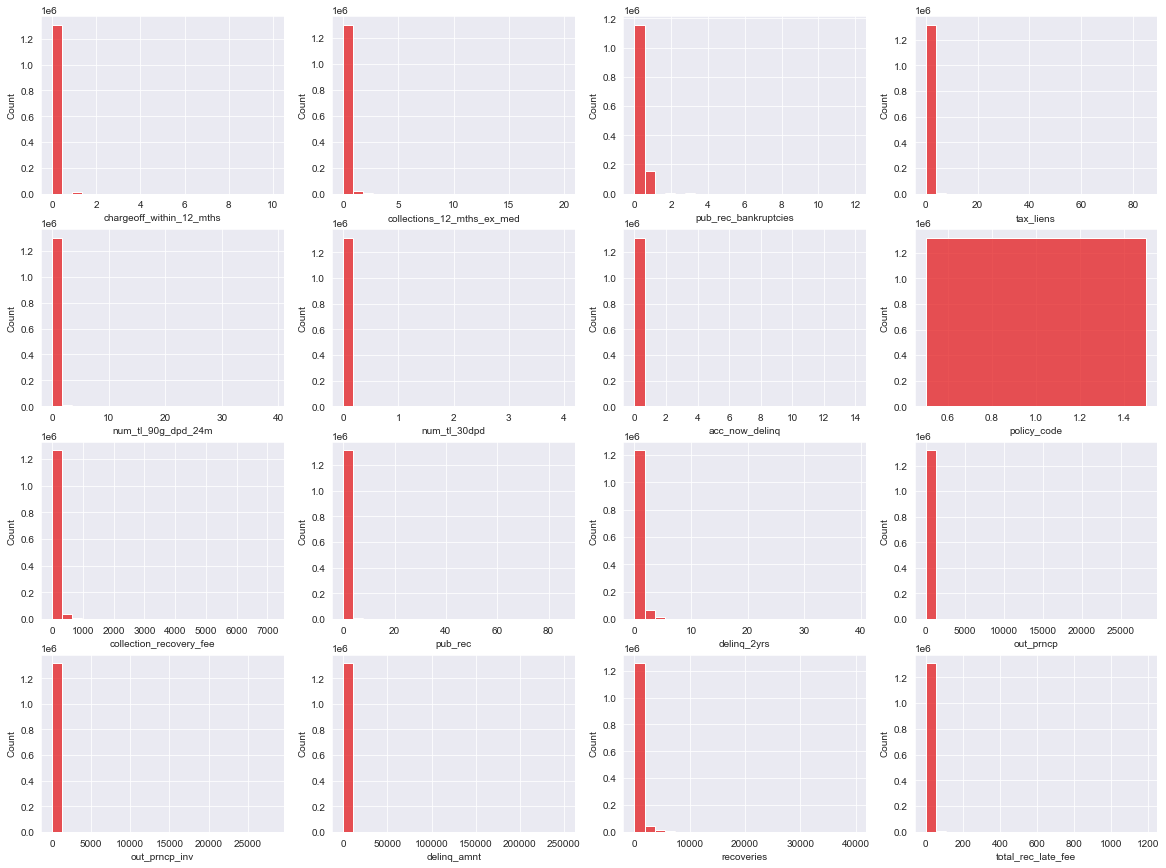

In [50]:
skew_list=['chargeoff_within_12_mths', 'collections_12_mths_ex_med', 'pub_rec_bankruptcies', 'tax_liens', 
           'num_tl_90g_dpd_24m', 'num_tl_30dpd', 'acc_now_delinq', 'policy_code', 'collection_recovery_fee', 
           'pub_rec' ,'delinq_2yrs', 'out_prncp', 'out_prncp_inv','delinq_amnt','recoveries','total_rec_late_fee']

#plotting histogram
plt.figure(figsize=(20, 15))
i, j = 4,4
for k in range(1, 17):
    plt.subplot(i, j, k)
    sns.histplot(individual_df[skew_list[k - 1]])

In [51]:
# dropping the skewed columns from individual dataframe
individual_df.drop(columns=skew_list,inplace=True,axis=1)

# rechecking the shape of individual dataframe
individual_df.shape

(1319544, 73)

In [52]:
# creating list for numerical features for individual dataframe
numerical_feature_ind=individual_df.columns[individual_df.dtypes != 'object']
len(numerical_feature_ind)

52

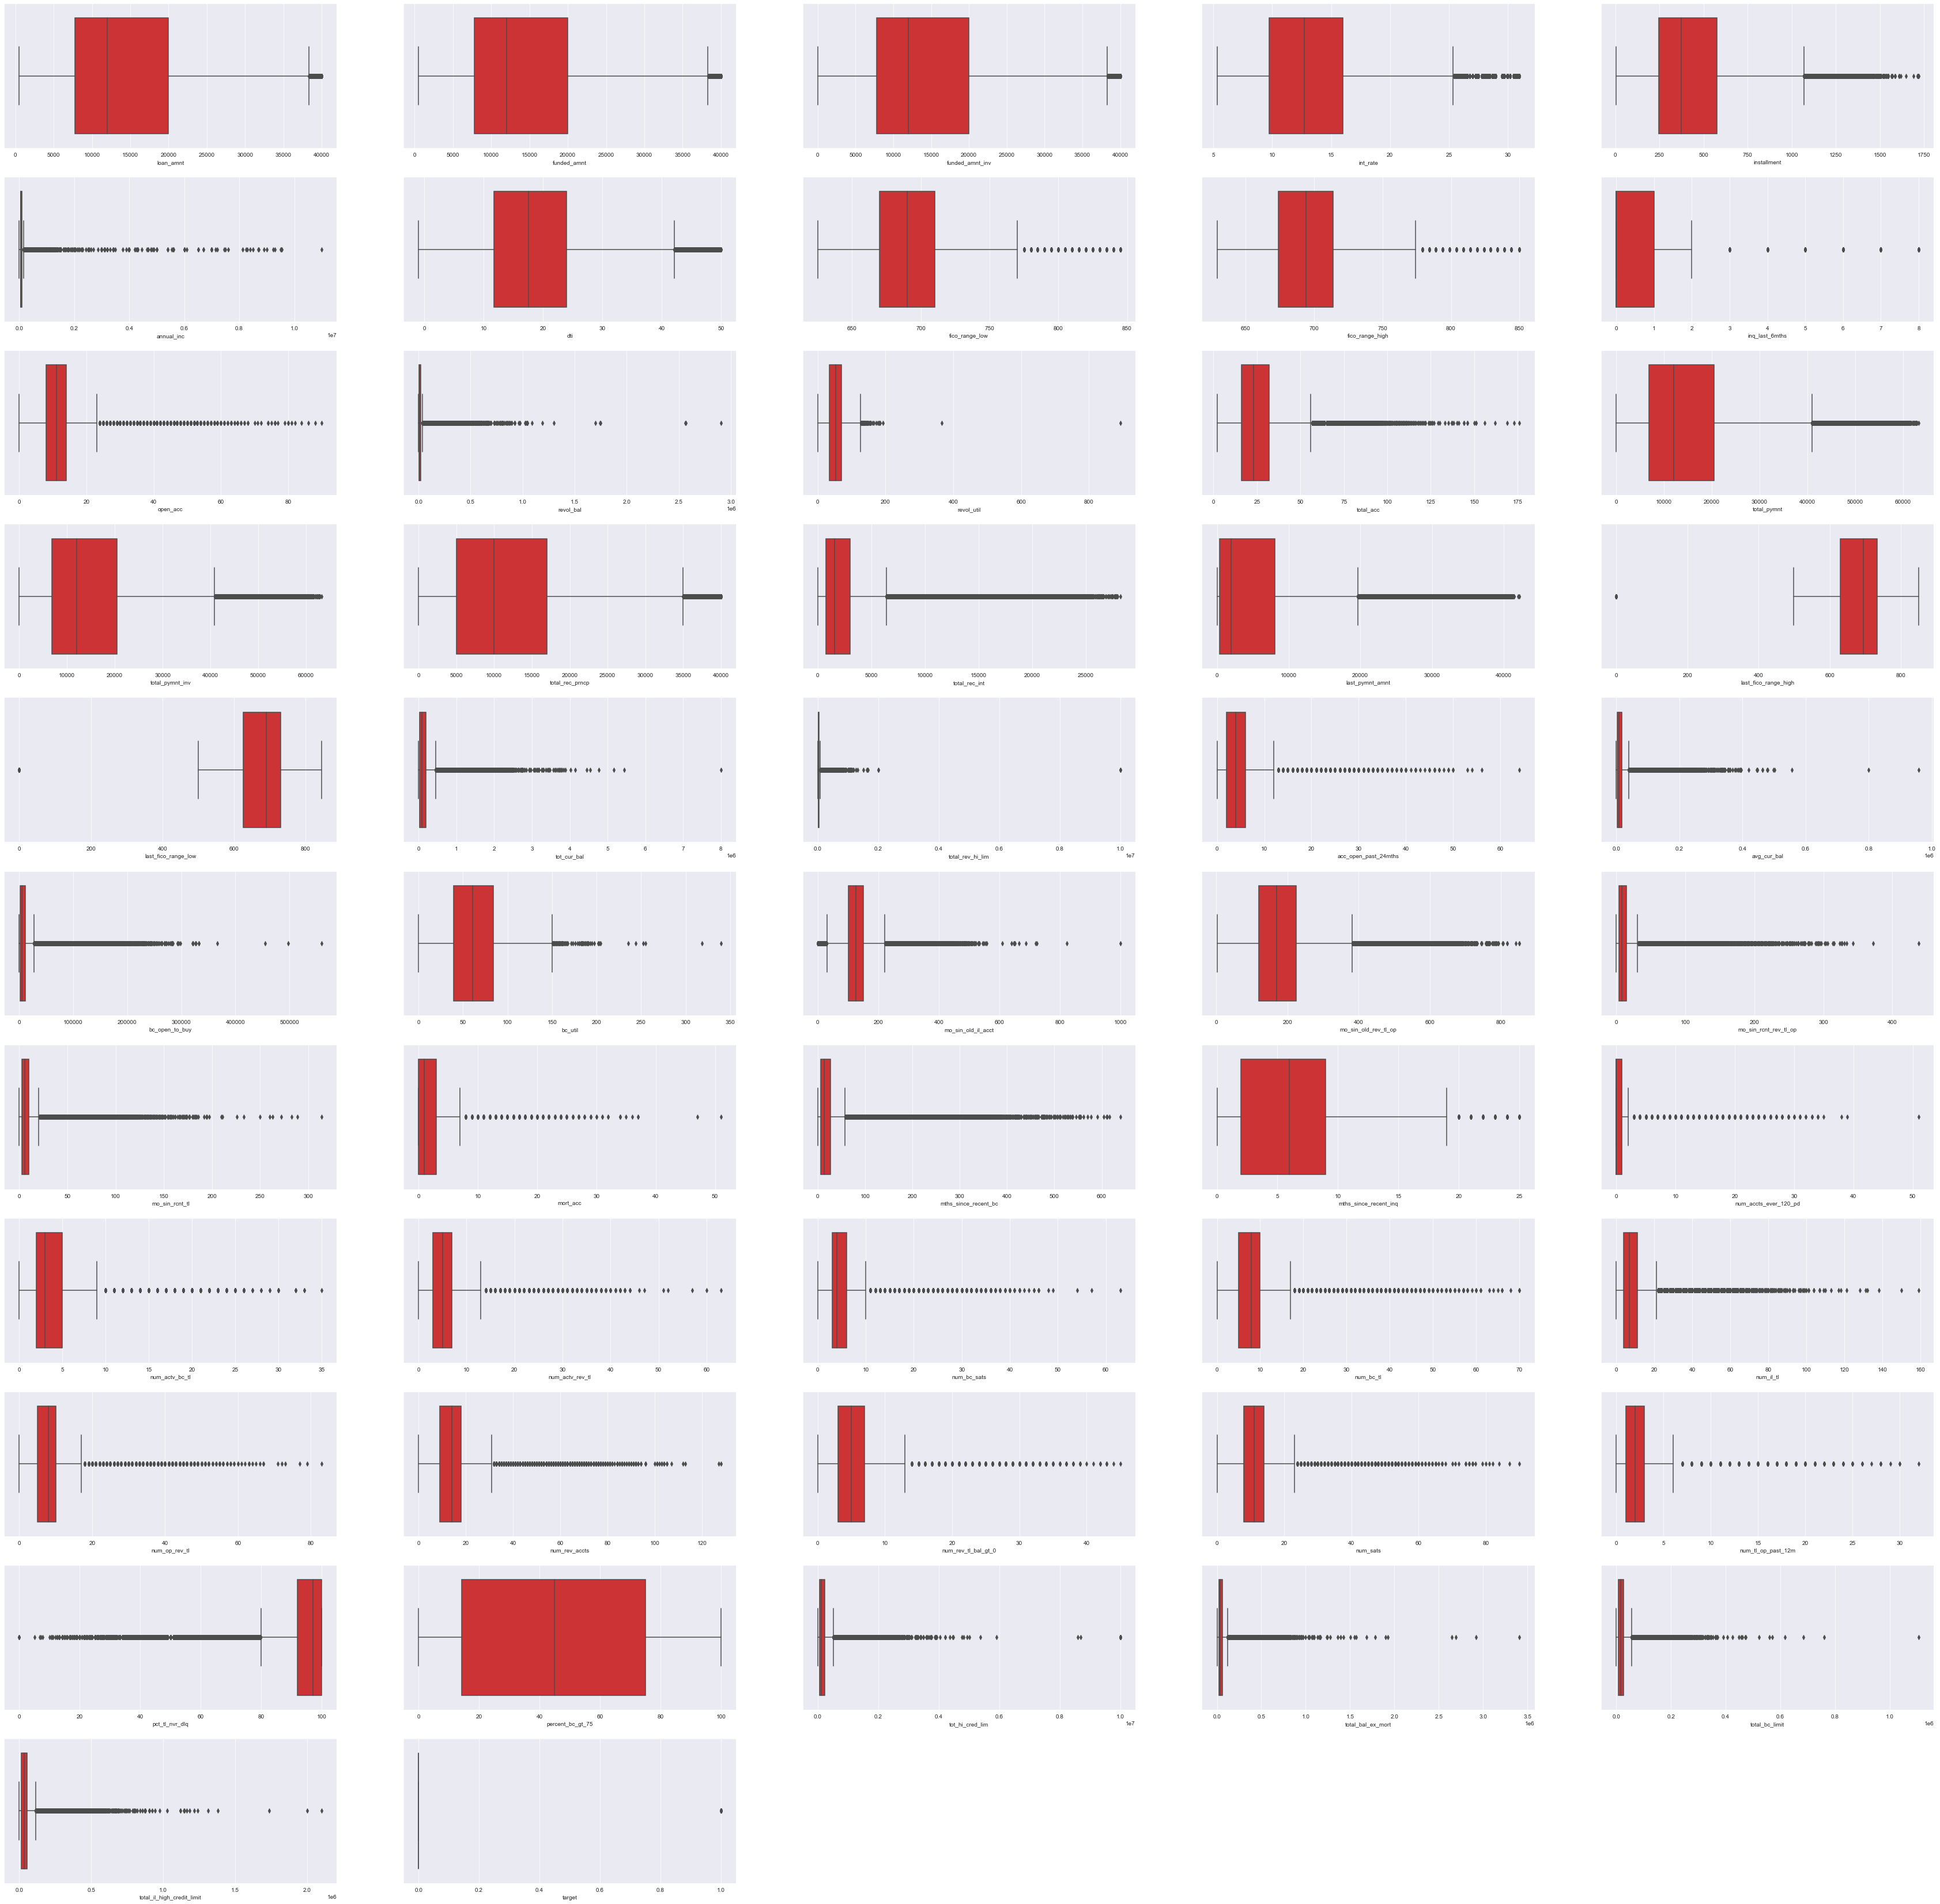

In [53]:
# plotting boxplot
plt.figure(figsize=(60, 60))
i, j = 11,5
for k in range(1, 53):
    plt.subplot(i, j, k)
    sns.boxplot(individual_df[numerical_feature_ind[k - 1]])

these outliers will mislead the result of SMOTE and learning model because of the high variation of the data range. and to handle them there is two approach one is to drop them or to cap them, dropping these values may be not good idea because they may hold important information about the non-default and default account so capping is the better idea.

In [54]:
# removing target feature from the outlier column list
numerical_feature_ind=numerical_feature_ind.drop('target')
len(numerical_feature_ind)

51

In [55]:
# capping the some outlier on 1 percentile and 99 percentile
outlier_99_ind=['loan_amnt','funded_amnt','funded_amnt_inv','dti','revol_util','total_rec_prncp','bc_util',
                'percent_bc_gt_75','last_fico_range_high']
for cols in outlier_99_ind:
    percentiles = individual_df[cols].quantile([0.01, 0.99]).values
    individual_df[cols] = np.clip(individual_df[cols], percentiles[0],percentiles[1])

    
# capping the some outlier on 1 percentile and 98 percentile
outlier_98_ind=['last_fico_range_low','num_actv_bc_tl','pct_tl_nvr_dlq','mort_acc','total_acc'
                ,'int_rate']
for cols in outlier_98_ind:
    percentiles = individual_df[cols].quantile([0.01, 0.98]).values
    individual_df[cols] = np.clip(individual_df[cols], percentiles[0],percentiles[1])

# recapping the lower limit for last_fico_range_low,pct_tl_nvr_dlq
percentiles = individual_df['last_fico_range_low'].quantile([0.03, 0.98]).values
individual_df['last_fico_range_low'] = np.clip(individual_df['last_fico_range_low'], percentiles[0],percentiles[1])

percentiles = individual_df['pct_tl_nvr_dlq'].quantile([0.07, 0.98]).values
individual_df['pct_tl_nvr_dlq'] = np.clip(individual_df['pct_tl_nvr_dlq'], percentiles[0],percentiles[1])



# capping the some outlier on 1 percentile and 97 percentile
outlier_97_ind=['total_pymnt_inv','num_rev_tl_bal_gt_0','acc_open_past_24mths','num_tl_op_past_12m',
                'num_actv_rev_tl','total_pymnt']
for cols in outlier_97_ind:
    percentiles = individual_df[cols].quantile([0.01, 0.97]).values
    individual_df[cols] = np.clip(individual_df[cols], percentiles[0],percentiles[1])

    
    
# capping the some outlier on 1 percentile and 96 percentile
outlier_96_ind=['installment','fico_range_high','tot_cur_bal','mths_since_recent_inq','num_rev_accts',
                'num_sats','tot_hi_cred_lim','mo_sin_old_rev_tl_op','open_acc','fico_range_low']
for cols in outlier_96_ind:
    percentiles = individual_df[cols].quantile([0.01, 0.96]).values
    individual_df[cols] = np.clip(individual_df[cols], percentiles[0],percentiles[1])
    
    
    
# capping the some outlier on 1 percentile and 95 percentile
outlier_95_ind=['annual_inc','num_op_rev_tl','num_bc_sats','num_bc_tl']
for cols in outlier_95_ind:
    percentiles = individual_df[cols].quantile([0.01, 0.95]).values
    individual_df[cols] = np.clip(individual_df[cols], percentiles[0],percentiles[1])
    
    
    
# capping the some outlier on 1 percentile and 94 percentile
outlier_94_ind=['inq_last_6mths','revol_bal','last_pymnt_amnt','avg_cur_bal','mo_sin_rcnt_tl',
                'num_accts_ever_120_pd','num_il_tl','total_il_high_credit_limit']
for cols in outlier_94_ind:
    percentiles = individual_df[cols].quantile([0.01, 0.94]).values
    individual_df[cols] = np.clip(individual_df[cols], percentiles[0],percentiles[1])
    
    
    
# capping the some outlier on 1 percentile and 93 percentile    
outlier_93_ind=['total_bal_ex_mort','total_bc_limit','total_rev_hi_lim','mo_sin_old_il_acct']
for cols in outlier_93_ind:
    percentiles = individual_df[cols].quantile([0.01, 0.93]).values
    individual_df[cols] = np.clip(individual_df[cols], percentiles[0],percentiles[1])
# recapping the lower limit for mo_sin_old_il_acct
percentiles = individual_df['mo_sin_old_il_acct'].quantile([0.04, 0.93]).values
individual_df['mo_sin_old_il_acct'] = np.clip(individual_df['mo_sin_old_il_acct'], percentiles[0],percentiles[1])
    
    
    
# capping the some outlier on 1 percentile and 92 percentile
percentiles = individual_df['total_rec_int'].quantile([0.01, 0.92]).values
individual_df['total_rec_int'] = np.clip(individual_df['total_rec_int'], percentiles[0],percentiles[1])


    
    
# capping the some outlier on 1 percentile and 91 percentile
percentiles = individual_df['mo_sin_rcnt_rev_tl_op'].quantile([0.01, 0.91]).values
individual_df['mo_sin_rcnt_rev_tl_op'] = np.clip(individual_df['mo_sin_rcnt_rev_tl_op'], percentiles[0],percentiles[1])


# capping the some outlier on 1 percentile and 90 percentile
outlier_90_ind=['bc_open_to_buy','mo_sin_rcnt_rev_tl_op','mths_since_recent_bc']
for cols in outlier_90_ind:
    percentiles = individual_df[cols].quantile([0.01, 0.90]).values
    individual_df[cols] = np.clip(individual_df[cols], percentiles[0],percentiles[1])

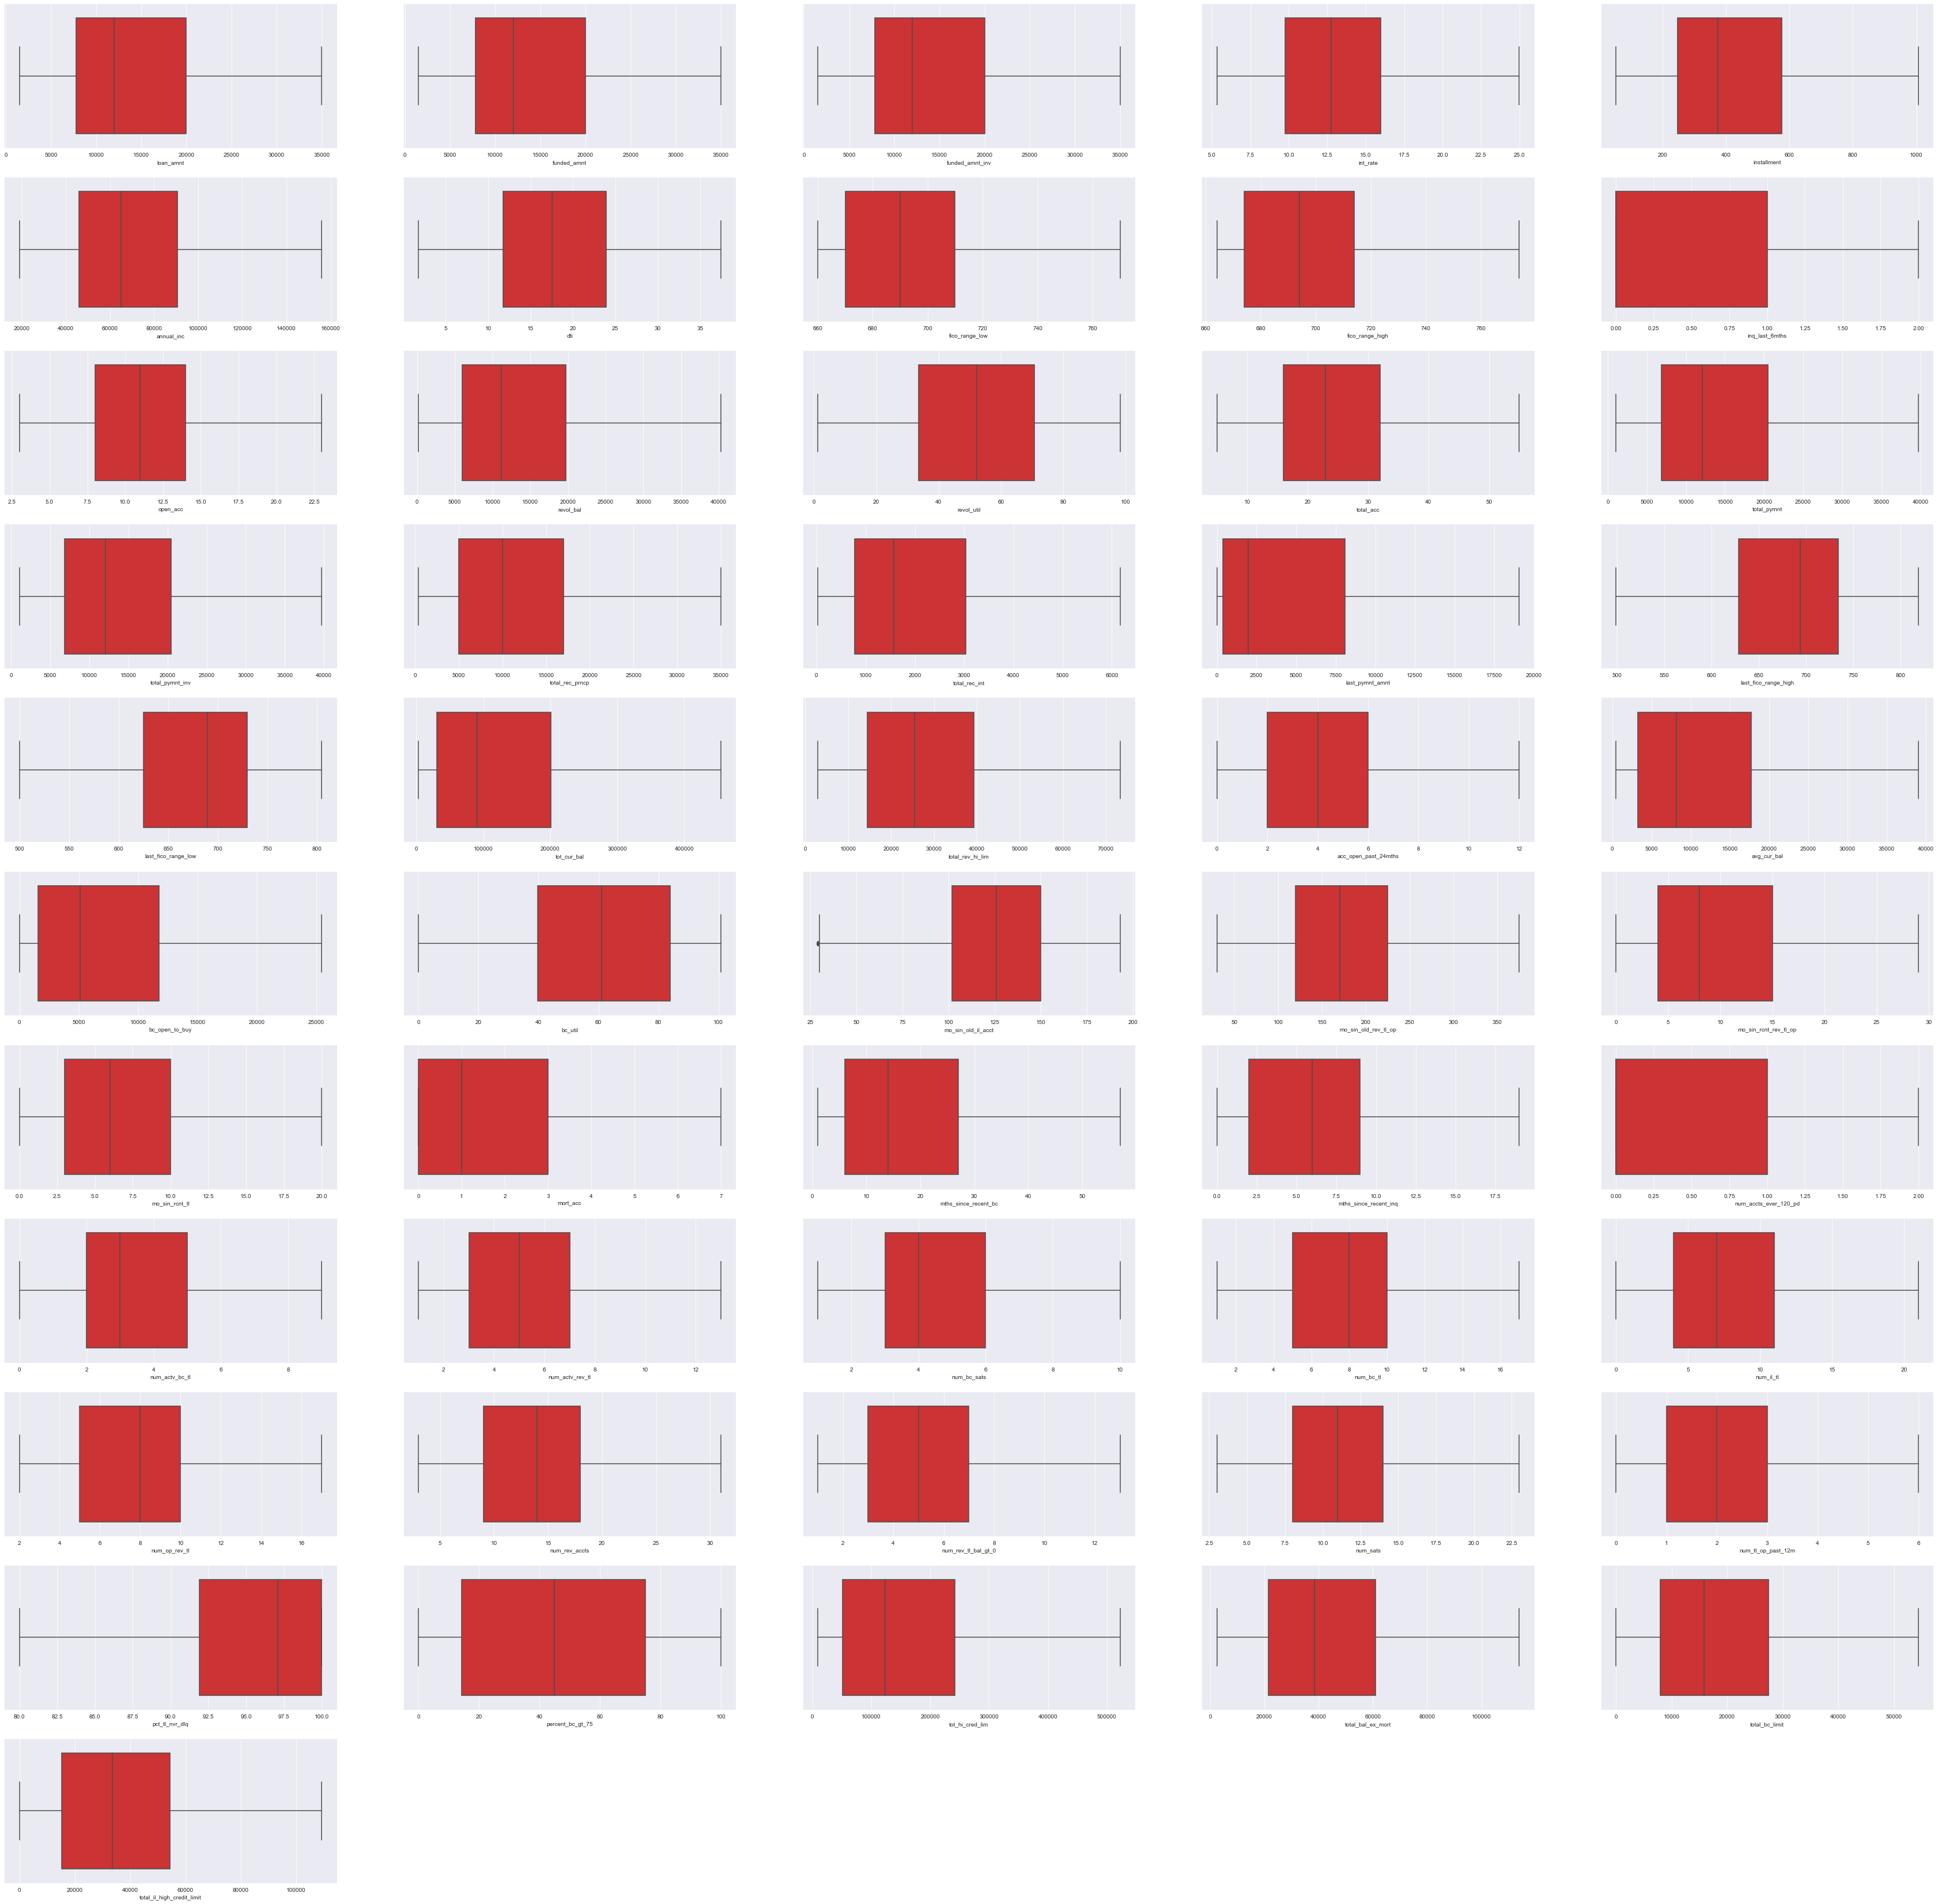

In [56]:
# plotting boxplot
plt.figure(figsize=(60, 60))
i, j = 11,5
for k in range(1, 52):
    plt.subplot(i, j, k)
    sns.boxplot(individual_df[numerical_feature_ind[k - 1]])

**All outliers handled successfully for individual Dataframe**

**For joint dataframe**

In [57]:
joint_app_df.kurtosis(axis=0).sort_values(ascending=False)

tot_coll_amt                          18365.050012
out_prncp_inv                         12849.176426
out_prncp                             12849.176426
delinq_amnt                           12770.545608
sec_app_chargeoff_within_12_mths        637.222369
num_tl_30dpd                            581.351415
acc_now_delinq                          458.911263
num_tl_90g_dpd_24m                      400.988320
sec_app_collections_12_mths_ex_med      337.730110
chargeoff_within_12_mths                299.943538
dti                                     214.237848
tax_liens                               206.029050
total_rec_late_fee                      204.104614
revol_bal                               115.461056
collection_recovery_fee                 102.473166
collections_12_mths_ex_med              102.253932
recoveries                               92.074187
annual_inc                               87.994091
avg_cur_bal                              67.765589
delinq_2yrs                    

In [58]:
numerical_feature_jnt=joint_app_df.columns[joint_app_df.dtypes != 'object']
# dropping the target feature
numerical_feature_jnt=numerical_feature_jnt.drop('target')
len(numerical_feature_jnt)

95

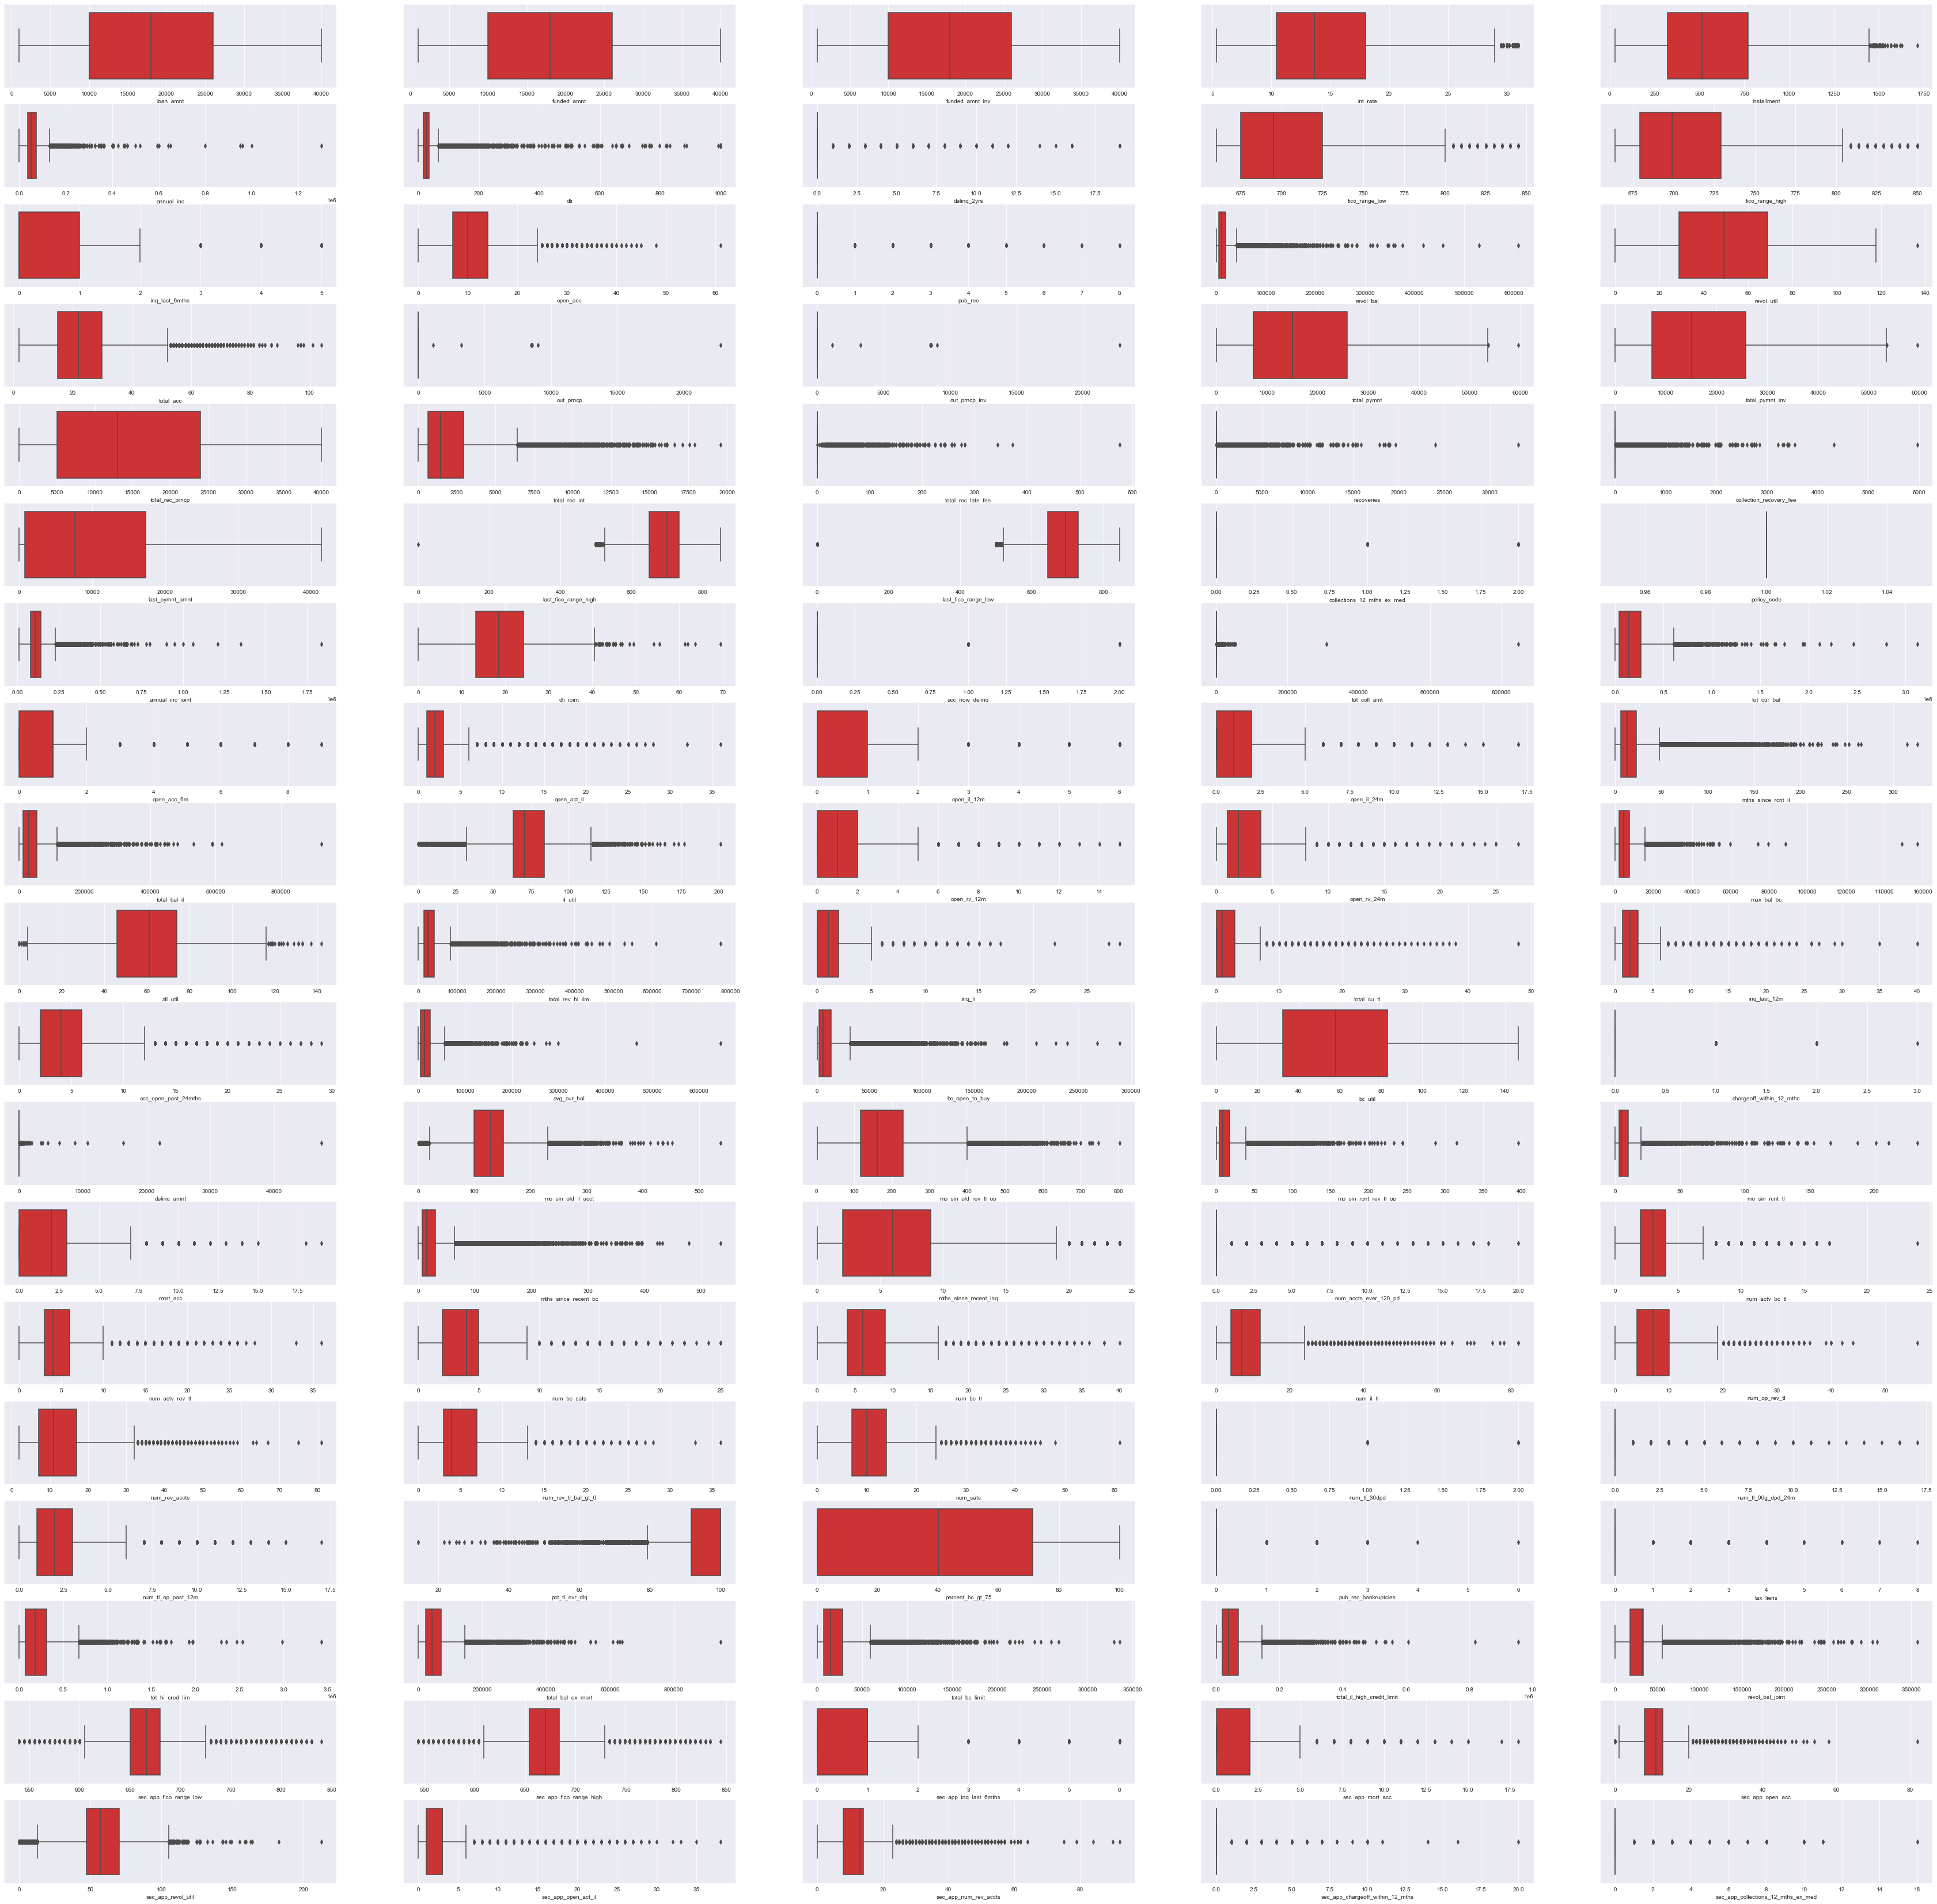

In [59]:
# plotting boxplot
plt.figure(figsize=(60, 60))
i, j = 19,5
for k in range(1, 96):
    plt.subplot(i, j, k)
    sns.boxplot(joint_app_df[numerical_feature_jnt[k - 1]])

some of the features like **delinq_amnt, delinq_2yrs and others** has more than 80% skewness towards single class label. **policy_code** has 100% skewness that shows it has only single values. these features will not add meaning to the learning so dropping these columns is the good idea 

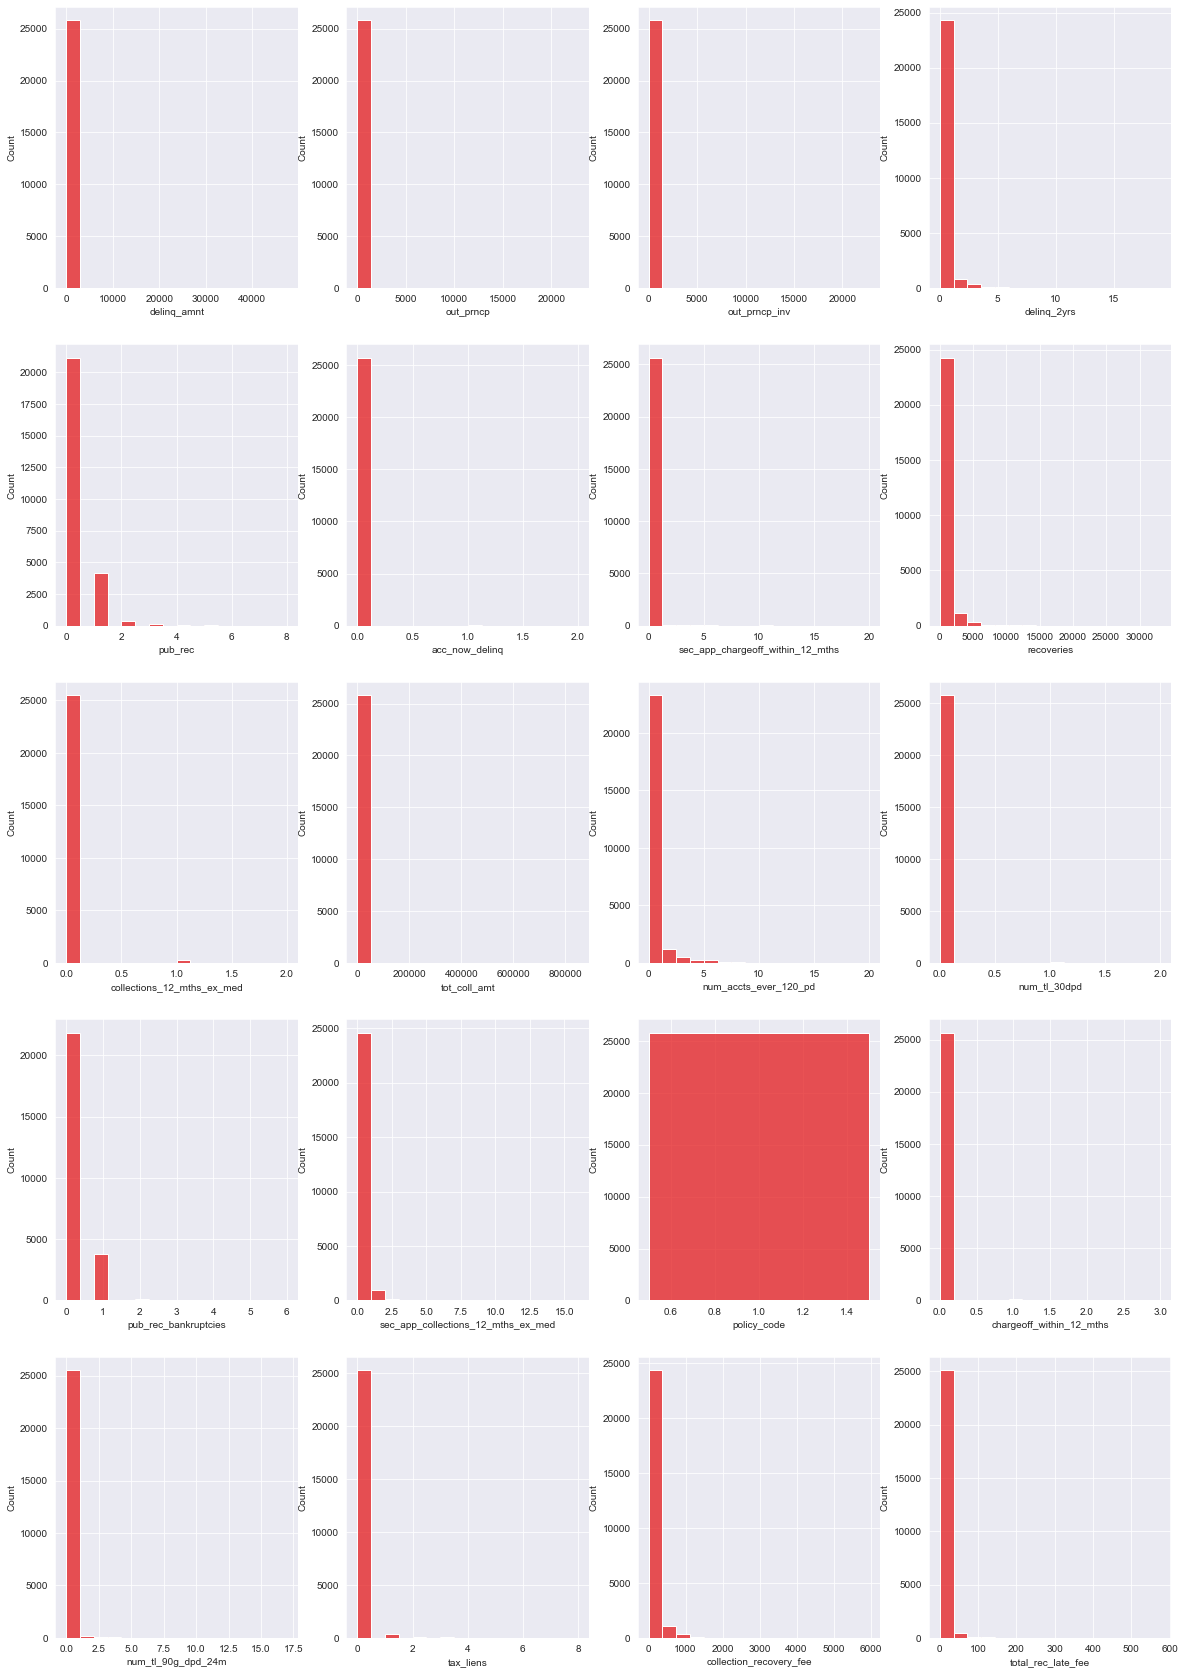

In [60]:
# creating list for skew features for joint applicant dataframe
skew_list_jnt=['delinq_amnt','out_prncp','out_prncp_inv','delinq_2yrs','pub_rec','acc_now_delinq',
               'sec_app_chargeoff_within_12_mths','recoveries','collections_12_mths_ex_med','tot_coll_amt',
               'num_accts_ever_120_pd','num_tl_30dpd','pub_rec_bankruptcies','sec_app_collections_12_mths_ex_med',
               'policy_code', 'chargeoff_within_12_mths','num_tl_90g_dpd_24m','tax_liens','collection_recovery_fee',
                'total_rec_late_fee']
#plotting histogram
plt.figure(figsize=(20, 30))
i, j = 5,4
for k in range(1, 21):
    plt.subplot(i, j, k)
    sns.histplot(joint_app_df[skew_list_jnt[k - 1]])

In [61]:
len(skew_list_jnt)

20

In [62]:
# dropping the columns
joint_app_df.drop(columns=skew_list_jnt,axis=1,inplace=True)

# rechecking the shape of the joint_app_df
joint_app_df.shape

(25806, 99)

In [63]:
# recreating the numerical feature list for resized joint dataframe
numerical_feature_jnt=joint_app_df.columns[joint_app_df.dtypes != 'object']
# dropping the target feature
numerical_feature_jnt=numerical_feature_jnt.drop('target')
len(numerical_feature_jnt)

75

some of the boxplot shows some features like bc_util,funded_amnt and other has no outlier so there is no need to cap them so those features will be removed from the numerical_feature list. 

In [64]:
non_outlier_cols_jnt=['loan_amnt','last_pymnt_amnt','total_rec_prncp','funded_amnt','funded_amnt_inv','percent_bc_gt_75'
                      ,'bc_util']

# dropping non_outlier features 
numerical_feature_jnt=numerical_feature_jnt.drop(non_outlier_cols_jnt)
len(numerical_feature_jnt)

68

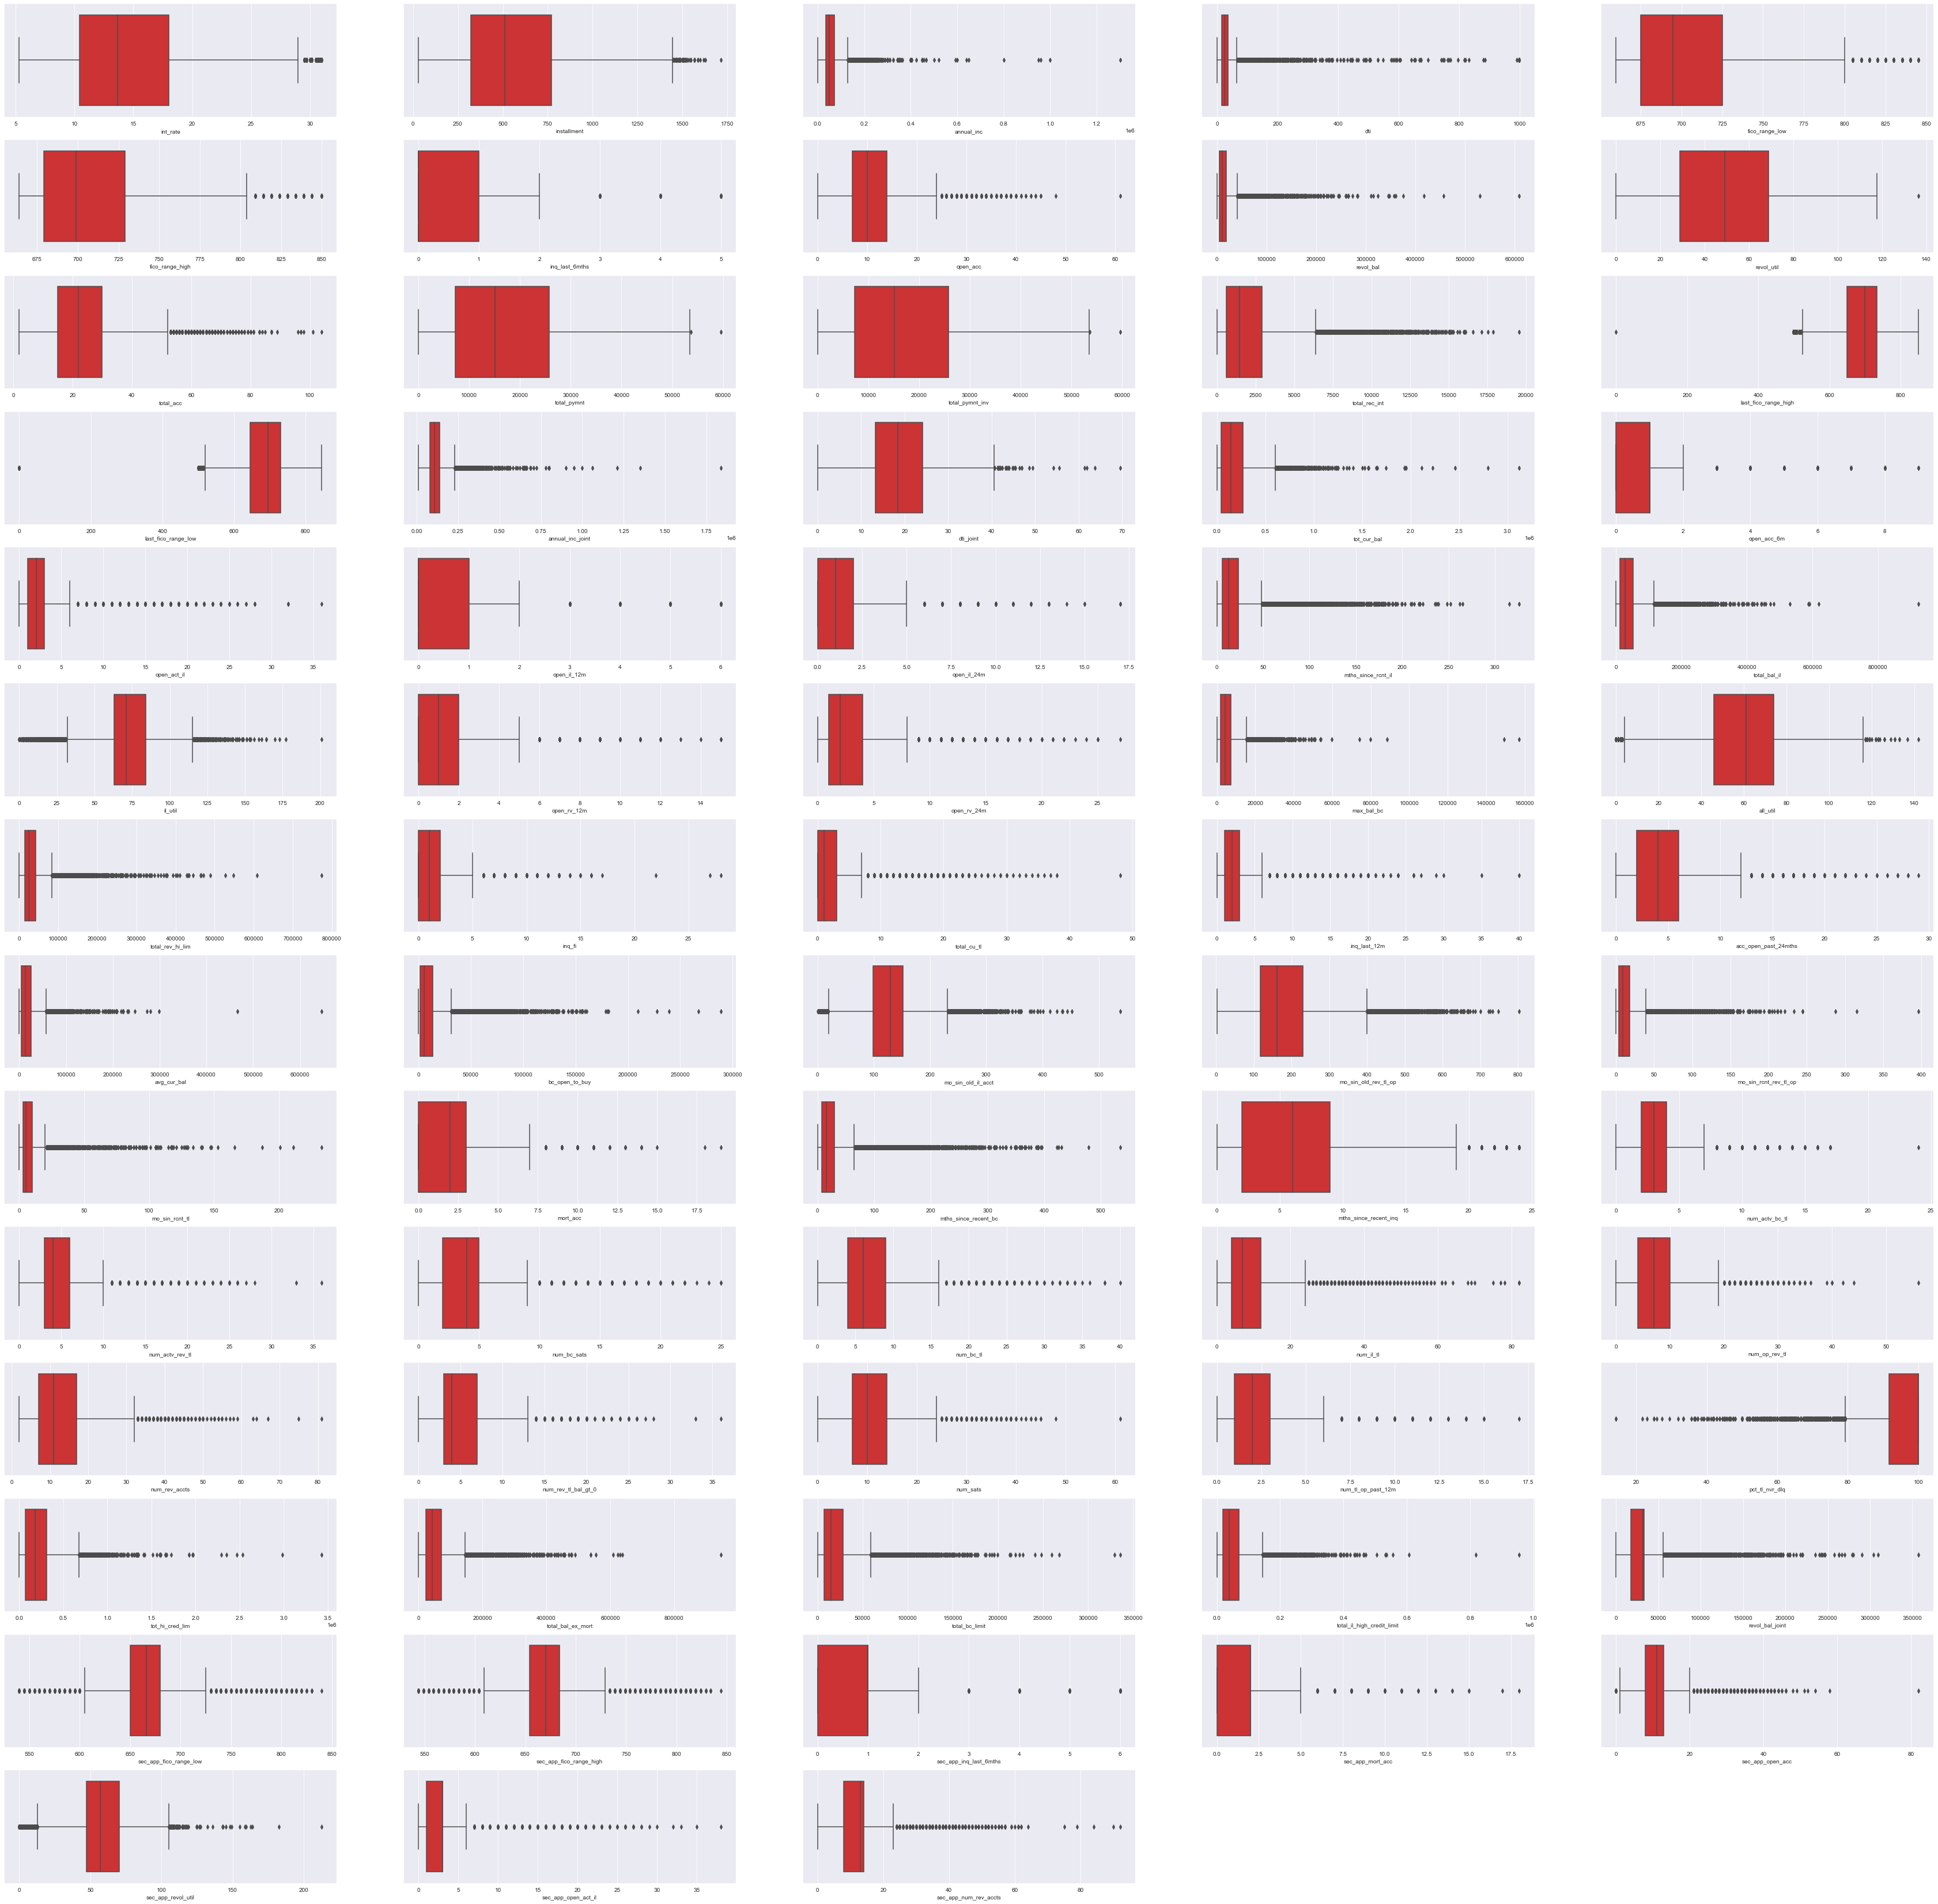

In [65]:
# replotting boxplot
plt.figure(figsize=(60, 60))
i, j = 14,5
for k in range(1, 69):
    plt.subplot(i, j, k)
    sns.boxplot(joint_app_df[numerical_feature_jnt[k - 1]])

In [66]:
lower_limit=['pct_tl_nvr_dlq','sec_app_revol_util','il_util','last_fico_range_low','pct_tl_nvr_dlq','last_fico_range_high']

outlier_99_jnt=['all_util','total_pymnt','installment','total_pymnt_inv','mort_acc','dti_joint','revol_util']
for cols in outlier_99_jnt:
    percentiles = joint_app_df[cols].quantile([0.01, 0.99]).values
    joint_app_df[cols] = np.clip(joint_app_df[cols], percentiles[0],percentiles[1])



outlier_97_jnt=['open_rv_12m','mo_sin_old_il_acct','num_tl_op_past_12m','tot_hi_cred_lim','num_op_rev_tl','open_rv_24m'
                ,'open_acc','acc_open_past_24mths','num_rev_accts','num_rev_tl_bal_gt_0','tot_cur_bal','total_acc',
                'fico_range_low','fico_range_high','inq_fi','num_bc_tl','num_sats','sec_app_mort_acc']
for cols in outlier_97_jnt:
    percentiles = joint_app_df[cols].quantile([0.01, 0.97]).values
    joint_app_df[cols] = np.clip(joint_app_df[cols], percentiles[0],percentiles[1])

# recapping the lower limit
percentiles = joint_app_df['mo_sin_old_il_acct'].quantile([0.03, 0.97]).values
joint_app_df['mo_sin_old_il_acct'] = np.clip(joint_app_df['mo_sin_old_il_acct'], percentiles[0],percentiles[1])
    

    


outlier_95_jnt=['int_rate','annual_inc_joint','open_il_24m','num_bc_sats','total_il_high_credit_limit','num_il_tl',
                'mths_since_recent_inq','mo_sin_old_rev_tl_op','total_rec_int','annual_inc','num_actv_bc_tl',
                'total_bal_ex_mort','avg_cur_bal','inq_last_6mths']
for cols in outlier_95_jnt:
    percentiles = joint_app_df[cols].quantile([0.01, 0.95]).values
    joint_app_df[cols] = np.clip(joint_app_df[cols], percentiles[0],percentiles[1])
    
    

    

outlier_93_jnt=['dti','total_rev_hi_lim','mo_sin_rcnt_tl','sec_app_fico_range_low','sec_app_fico_range_high',
                'total_cu_tl','open_il_12m','revol_bal','inq_last_12m','num_actv_rev_tl','sec_app_inq_last_6mths',
                'sec_app_open_acc','total_bc_limit','total_bal_il']
for cols in outlier_93_jnt:
    percentiles = joint_app_df[cols].quantile([0.01, 0.93]).values
    joint_app_df[cols] = np.clip(joint_app_df[cols], percentiles[0],percentiles[1])
    
# recapping the lower limit
percentiles = joint_app_df['sec_app_fico_range_low'].quantile([0.06,1]).values
joint_app_df['sec_app_fico_range_low'] = np.clip(joint_app_df['sec_app_fico_range_low'], percentiles[0],percentiles[1]) 

percentiles = joint_app_df['sec_app_fico_range_high'].quantile([0.07,1]).values
joint_app_df['sec_app_fico_range_high'] = np.clip(joint_app_df['sec_app_fico_range_high'], percentiles[0],percentiles[1]) 
    



outlier_92_jnt=['open_act_il','sec_app_open_act_il','mo_sin_rcnt_rev_tl_op','max_bal_bc','sec_app_num_rev_accts']
for cols in outlier_92_jnt:
    percentiles = joint_app_df[cols].quantile([0.01, 0.92]).values
    joint_app_df[cols] = np.clip(joint_app_df[cols], percentiles[0],percentiles[1])
    
    

    


outlier_90_jnt=['open_acc_6m','bc_open_to_buy','revol_bal_joint','mths_since_recent_bc','mths_since_rcnt_il',]
for cols in outlier_90_jnt:
    percentiles = joint_app_df[cols].quantile([0.01, 0.90]).values
    joint_app_df[cols] = np.clip(joint_app_df[cols], percentiles[0],percentiles[1])
    

    

percentiles = joint_app_df['last_fico_range_low'].quantile([0.05,1]).values
joint_app_df['last_fico_range_low'] = np.clip(joint_app_df['last_fico_range_low'], percentiles[0],percentiles[1])   



percentiles = joint_app_df['pct_tl_nvr_dlq'].quantile([0.08,1]).values
joint_app_df['pct_tl_nvr_dlq'] = np.clip(joint_app_df['pct_tl_nvr_dlq'], percentiles[0],percentiles[1])



outlier_05_jnt=['il_util','sec_app_revol_util','last_fico_range_high']
for cols in outlier_05_jnt:
    percentiles = joint_app_df[cols].quantile([0.05, 0.99]).values
    joint_app_df[cols] = np.clip(joint_app_df[cols], percentiles[0],percentiles[1])

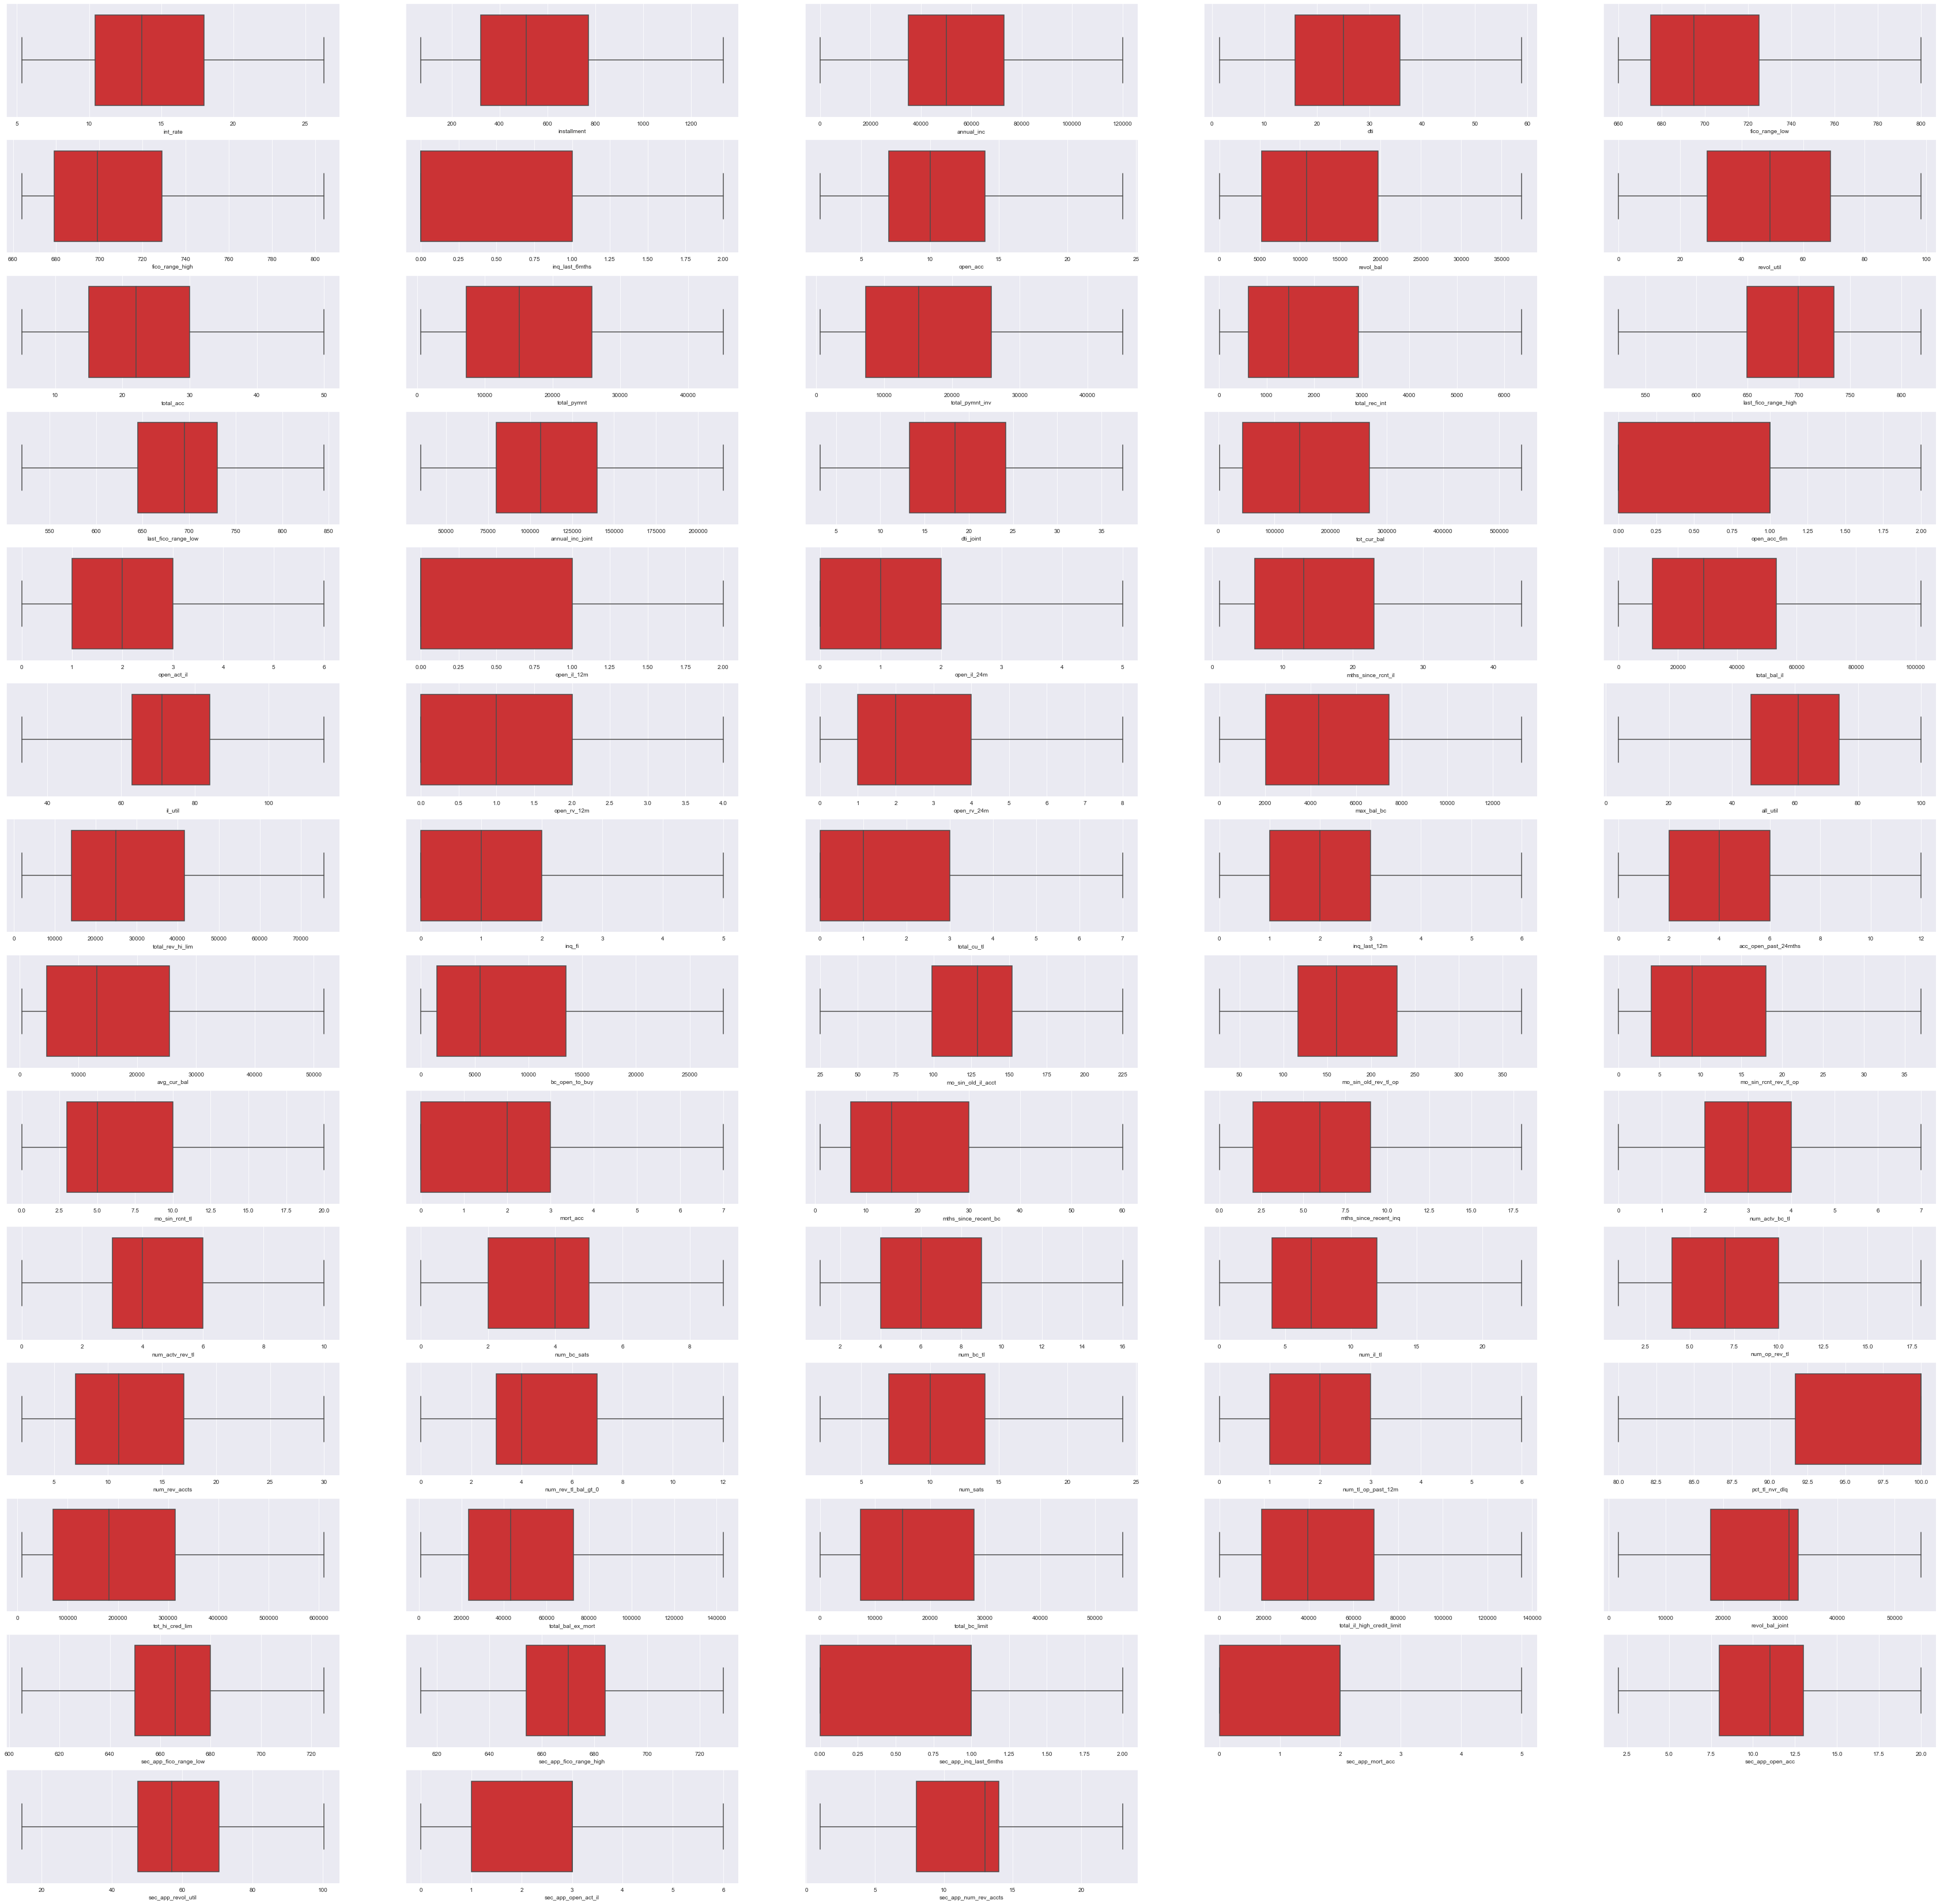

In [67]:
# replotting boxplot
plt.figure(figsize=(60, 60))
i, j = 14,5
for k in range(1, 69):
    plt.subplot(i, j, k)
    sns.boxplot(joint_app_df[numerical_feature_jnt[k - 1]])

**All outliers capped successfully**

In [68]:
print("shape of individual dataframe :",individual_df.shape)
print("shape of joint dataframe :",joint_app_df.shape)

shape of individual dataframe : (1319544, 73)
shape of joint dataframe : (25806, 99)


### Redundant Feature

**for individual dataframe**

In [69]:
individual_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1319544 entries, 0 to 1319543
Data columns (total 73 columns):
 #   Column                      Non-Null Count    Dtype  
---  ------                      --------------    -----  
 0   loan_amnt                   1319544 non-null  float64
 1   funded_amnt                 1319544 non-null  float64
 2   funded_amnt_inv             1319544 non-null  float64
 3   term                        1319544 non-null  object 
 4   int_rate                    1319544 non-null  float64
 5   installment                 1319544 non-null  float64
 6   grade                       1319544 non-null  object 
 7   sub_grade                   1319544 non-null  object 
 8   emp_title                   1319544 non-null  object 
 9   emp_length                  1319544 non-null  object 
 10  home_ownership              1319544 non-null  object 
 11  annual_inc                  1319544 non-null  float64
 12  verification_status         1319544 non-null  object 
 1

In [70]:
individual_df[['loan_amnt','funded_amnt','funded_amnt_inv','total_pymnt','total_pymnt_inv','target']].corr()

,loan_amnt,funded_amnt,funded_amnt_inv,total_pymnt,total_pymnt_inv,target
loan_amnt,1.000000,0.999540,0.998539,0.859035,0.858488,0.066192
funded_amnt,0.999540,1.000000,0.999090,0.859283,0.858821,0.066247
funded_amnt_inv,0.998539,0.999090,1.000000,0.858610,0.859654,0.066028
total_pymnt,0.859035,0.859283,0.858610,1.000000,0.999263,-0.316132
total_pymnt_inv,0.858488,0.858821,0.859654,0.999263,1.000000,-0.315693
target,0.066192,0.066247,0.066028,-0.316132,-0.315693,1.000000


In [71]:
individual_df.drop(columns=['funded_amnt','funded_amnt_inv','total_pymnt_inv'],axis=1,inplace=True)

In [72]:
individual_df[['fico_range_high','fico_range_low','last_fico_range_high','last_fico_range_low']].corr()

,fico_range_high,fico_range_low,last_fico_range_high,last_fico_range_low
fico_range_high,1.00000,1.00000,0.341440,0.340460
fico_range_low,1.00000,1.00000,0.341440,0.340460
last_fico_range_high,0.34144,0.34144,1.000000,0.999856
last_fico_range_low,0.34046,0.34046,0.999856,1.000000


fico_range_high and fico_range_low has correlation value 1 they both are highly correlated. and last_fico_range_high and last_fico_range_low has correlation value 99.98% which is also very much high. this high multicollinearity between independent variable is not good for learning . so to reduce this dropping these columns is the best solution. but these columns hold important information. so lets create new feature avg_fico and avg_last_fico by averaging these columns and afterwards will drop these columns.

In [73]:
individual_df['avg_fico_range']=round((individual_df['fico_range_high']+individual_df['fico_range_low'])/2,2)
individual_df['avg_last_fico_range']=round((individual_df['last_fico_range_high']+individual_df['last_fico_range_low'])/2,2)

In [74]:
individual_df.drop(columns=['fico_range_high','fico_range_low','last_fico_range_high','last_fico_range_low'],inplace=True,axis=1)

**for joint dataframe**

In [75]:
joint_app_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25806 entries, 0 to 25805
Data columns (total 99 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   loan_amnt                   25806 non-null  float64
 1   funded_amnt                 25806 non-null  float64
 2   funded_amnt_inv             25806 non-null  float64
 3   term                        25806 non-null  object 
 4   int_rate                    25806 non-null  float64
 5   installment                 25806 non-null  float64
 6   grade                       25806 non-null  object 
 7   sub_grade                   25806 non-null  object 
 8   emp_title                   25806 non-null  object 
 9   emp_length                  25806 non-null  object 
 10  home_ownership              25806 non-null  object 
 11  annual_inc                  25806 non-null  float64
 12  verification_status         25806 non-null  object 
 13  issue_d                     258

In [76]:
# checking the duplicate value
joint_app_df[['loan_amnt','funded_amnt','funded_amnt_inv','total_pymnt','total_pymnt_inv','target']].corr()

,loan_amnt,funded_amnt,funded_amnt_inv,total_pymnt,total_pymnt_inv,target
loan_amnt,1.000000,1.000000,0.999993,0.778734,0.778776,0.018210
funded_amnt,1.000000,1.000000,0.999993,0.778734,0.778776,0.018210
funded_amnt_inv,0.999993,0.999993,1.000000,0.778670,0.778722,0.018251
total_pymnt,0.778734,0.778734,0.778670,1.000000,0.999995,-0.508276
total_pymnt_inv,0.778776,0.778776,0.778722,0.999995,1.000000,-0.508249
target,0.018210,0.018210,0.018251,-0.508276,-0.508249,1.000000


In [77]:
# checking the feature value for fico score
joint_app_df[['fico_range_high','fico_range_low','last_fico_range_high','last_fico_range_low',
              'sec_app_fico_range_low','sec_app_fico_range_high']].corr()

,fico_range_high,fico_range_low,last_fico_range_high,last_fico_range_low,sec_app_fico_range_low,sec_app_fico_range_high
fico_range_high,1.000000,1.000000,0.436026,0.437626,0.365191,0.374109
fico_range_low,1.000000,1.000000,0.436026,0.437626,0.365191,0.374109
last_fico_range_high,0.436026,0.436026,1.000000,0.999868,0.263444,0.266160
last_fico_range_low,0.437626,0.437626,0.999868,1.000000,0.263573,0.266303
sec_app_fico_range_low,0.365191,0.365191,0.263444,0.263573,1.000000,0.999372
sec_app_fico_range_high,0.374109,0.374109,0.266160,0.266303,0.999372,1.000000


In [78]:
# creating new features by averaging the feature values
joint_app_df['avg_fico_range']=round((joint_app_df['fico_range_high']+joint_app_df['fico_range_low'])/2,2)
joint_app_df['avg_last_fico_range']=round((joint_app_df['last_fico_range_high']+joint_app_df['last_fico_range_low'])/2,2)
joint_app_df['sec_avg_last_fico_range']=round((joint_app_df['sec_app_fico_range_high']+joint_app_df['sec_app_fico_range_low'])/2,2)

In [79]:
# dropping the duplicate columns
joint_app_df.drop(columns=['fico_range_high','fico_range_low','last_fico_range_high','last_fico_range_low',
              'sec_app_fico_range_low','sec_app_fico_range_high','funded_amnt','funded_amnt_inv','total_pymnt_inv'],axis=1,inplace=True)

In [80]:
# rechecking the shape of joint dataframe
joint_app_df.shape

(25806, 93)

## Data Analysis

### Univariate Analysis

for univariate analysis only default dataset will be considered in this study. so individual dataset is going to be seperated into default and non-default

In [81]:
individual_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1319544 entries, 0 to 1319543
Data columns (total 68 columns):
 #   Column                      Non-Null Count    Dtype  
---  ------                      --------------    -----  
 0   loan_amnt                   1319544 non-null  float64
 1   term                        1319544 non-null  object 
 2   int_rate                    1319544 non-null  float64
 3   installment                 1319544 non-null  float64
 4   grade                       1319544 non-null  object 
 5   sub_grade                   1319544 non-null  object 
 6   emp_title                   1319544 non-null  object 
 7   emp_length                  1319544 non-null  object 
 8   home_ownership              1319544 non-null  object 
 9   annual_inc                  1319544 non-null  float64
 10  verification_status         1319544 non-null  object 
 11  issue_d                     1319544 non-null  object 
 12  pymnt_plan                  1319544 non-null  object 
 1

In [82]:
individual_df_default=individual_df[individual_df['target']==1]
individual_df_default.shape

(262249, 68)

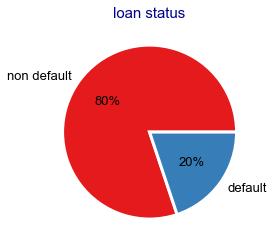

0    0.801258
1    0.198742
Name: target, dtype: float64

In [83]:
df1=individual_df.target.value_counts(normalize=True)
labels=['non default','default']
plt.title("loan status",
          fontdict={'color': 'darkblue','fontsize': 15})
plt.pie(df1.head(3),labels=labels, autopct = '%0.0f%%',textprops = {'color': 'black','fontsize':13},wedgeprops = {'linewidth': 3})
plt.show()
df1.head(3)

#### Individual dataset

**1. Loan Purpose**

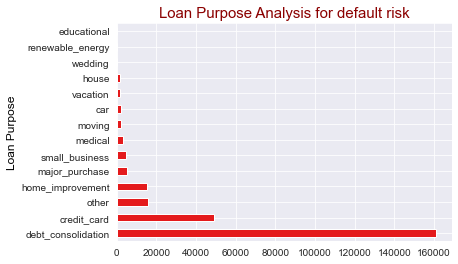

In [84]:
individual_df_default.purpose.value_counts().plot(kind='barh')
plt.title('Loan Purpose Analysis for default risk', fontdict={'color': 'Darkred', 'fontsize': 15})
plt.ylabel("Loan Purpose",fontdict={'color': 'black', 'fontsize': 12})
plt.show()

**Insight:**
1. the debt consolidation is the most reason for the loan purpose. debt consolodation is the way to refinance the debt. which just other way to switching between the debts. it has the highest risk associated.
2. the most secured loan is the housing loan and this is not in the top 5 reason.

**2. Annual_income**

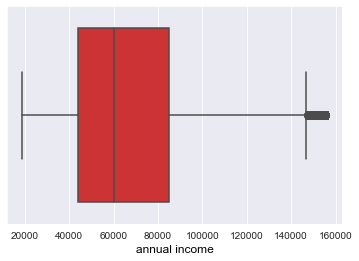

In [85]:
sns.boxplot(individual_df_default.annual_inc)
plt.xlabel("annual income",fontdict={'color': 'black', 'fontsize': 12})
plt.show()

**3. dti**

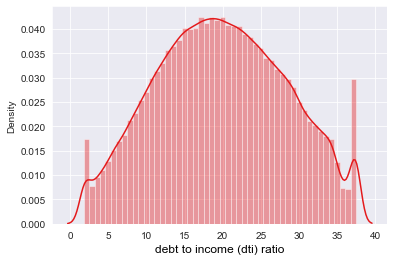

In [86]:
sns.distplot(individual_df_default.dti)
plt.xlabel("debt to income (dti) ratio",fontdict={'color': 'black', 'fontsize': 12})
plt.show()
#check

**4. Home ownership**

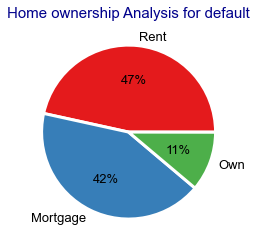

RENT        0.465599
MORTGAGE    0.422961
OWN         0.111123
Name: home_ownership, dtype: float64

In [87]:
df1=individual_df_default.home_ownership.value_counts(normalize=True)
labels=['Rent','Mortgage','Own']
plt.title("Home ownership Analysis for default",
          fontdict={'color': 'darkblue','fontsize': 15})
plt.pie(df1.head(3),labels=labels, autopct = '%0.0f%%',textprops = {'color': 'black','fontsize':13},wedgeprops = {'linewidth': 3})
plt.show()
df1.head(3)

**5. Interest rate**

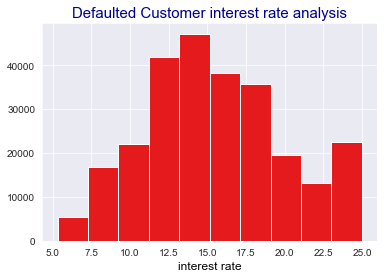

In [88]:
plt.hist(individual_df_default.int_rate)
plt.title("Defaulted Customer interest rate analysis",
         fontdict={'color': 'darkBlue','fontsize': 15})
plt.xlabel('interest rate',fontdict={'color': 'black','fontsize': 12})
plt.show()

**6. Number of Mortgagae Account Analysis for default customer**

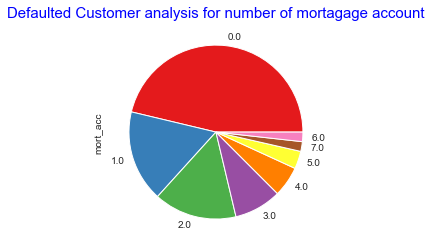

In [89]:
individual_df_default.mort_acc.value_counts().plot(kind='pie')
plt.title("Defaulted Customer analysis for number of mortagage account",
         fontdict={'color': 'Blue','fontsize': 15})
plt.show()

**Insight:**
1. Higher the number of mortagage account lower the chances of default.
2. most default customer dont have mortgage account that makes sense because they dont have any security for the loan.

**7. Average last Fico score range analysis for Default Customer**

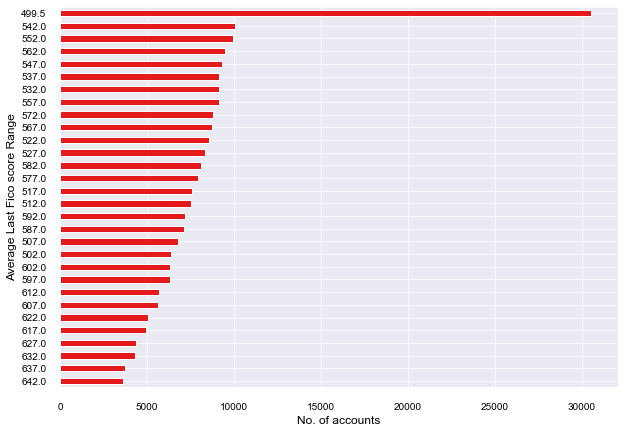

In [90]:
plt.figure(figsize=(10,7))
individual_df_default.avg_last_fico_range.value_counts().head(30).sort_values(ascending=True).plot(kind='barh')

plt.xlabel('No. of accounts',fontdict={'color':'black','fontsize': 12})
plt.tick_params(axis='x', colors='Black',size=12)
plt.tick_params(axis='y', colors='Black',size=10)
plt.ylabel('Average Last Fico score Range',fontdict={'color':'black','fontsize': 12})
plt.show()

**Insight**
1. the default customer Fico score is the lowest it is around 499.5. even in top 30 account counts its maximum fico score is 642

**8. Percentage of all bankcard accounts > 75% of limit.**

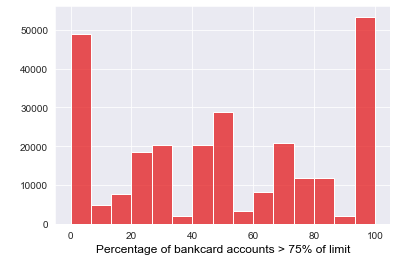

In [91]:
sns.histplot(individual_df_default.percent_bc_gt_75,bins=15)
plt.xlabel('Percentage of bankcard accounts > 75% of limit',fontdict={'color':'black','fontsize': 12})
plt.ylabel("  ")
plt.show()

**9. total recovery in principal**

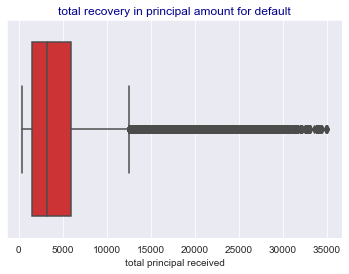

In [92]:
sns.boxplot(individual_df_default.total_rec_prncp)
plt.title("total recovery in principal amount for default",fontdict={'color':'darkblue','fontsize': 12})
plt.xlabel("total principal received")
plt.show()

**10. loan grades**

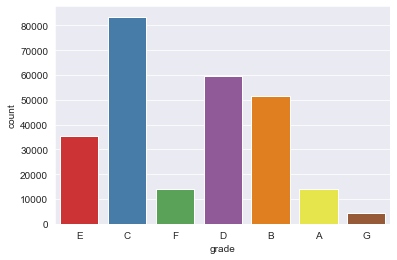

In [93]:
sns.countplot(individual_df_default.grade)
plt.show()

In [94]:
df=individual_df_default[individual_df_default.grade=='C']
print(max(df.int_rate))
print(min(df.int_rate))

17.27
6.0


#### Joint Dataset

In [95]:
joint_app_default=joint_app_df[joint_app_df['target']==1]
joint_app_default.shape

(6350, 93)

**8. Home ownership analysis for joint applicant**

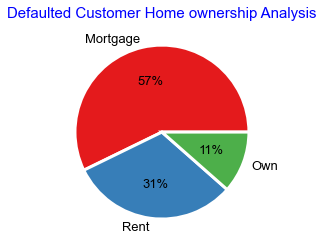

MORTGAGE    0.572283
RENT        0.312756
OWN         0.114961
Name: home_ownership, dtype: float64

In [96]:
df2=joint_app_default.home_ownership.value_counts(normalize=True)
labels=['Mortgage','Rent','Own']
plt.title("Defaulted Customer Home ownership Analysis",
          fontdict={'color': 'Blue','fontsize': 15})
plt.pie(df2.head(3),labels=labels, autopct = '%0.0f%%',textprops = {'color': 'Black','fontsize':13},wedgeprops = {'linewidth': 3})
plt.show()
joint_app_default.home_ownership.value_counts(normalize=True)

### Bivariate analysis

**Summary Report for individual Account**

In [97]:
summary=individual_df.groupby(['target'],as_index=False)[['loan_amnt','int_rate','annual_inc','avg_last_fico_range','dti']].mean()
summary['Class']=summary.target.apply(lambda x: 'Non-Default' if x==0 else 'Default')
summary.drop('target',axis=1,inplace=True)
summary.rename({'loan_amnt':'Average loan amount',
                'annual_inc':'Average annual income','avg_last_fico_range':'Average last FICO score range','int_rate':'Average interest rate','dti':'Average dti'},axis=1,inplace=True)
summary.set_index('Class',drop=True,inplace=True)
summary=round(summary,2)
summary

,Average loan amount,Average interest rate,Average annual income,Average last FICO score range,Average dti
Class,,,,,
Non-Default,14026.14,12.57,73733.85,702.10,17.55
Default,15450.99,15.57,68046.28,566.37,19.82


**1. Loan amount vs Loan Purpose**

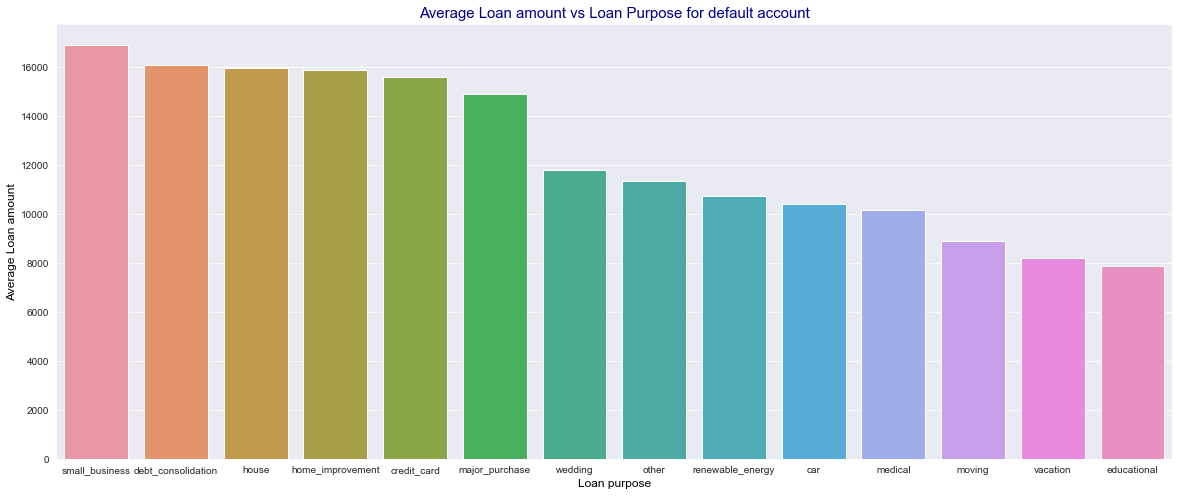

In [98]:
df3=individual_df_default.groupby(['purpose'], as_index=False)['loan_amnt'].mean().sort_values('loan_amnt',ascending=False)
plt.figure(figsize=(20,8))
sns.barplot(data=df3,x='purpose',y='loan_amnt')
plt.title("Average Loan amount vs Loan Purpose for default account",
         fontdict={'color': 'darkblue','fontsize': 15})
plt.xlabel("Loan purpose",fontdict={'color': 'black','fontsize': 12})
plt.ylabel("Average Loan amount",fontdict={'color': 'black','fontsize': 12})
plt.show()

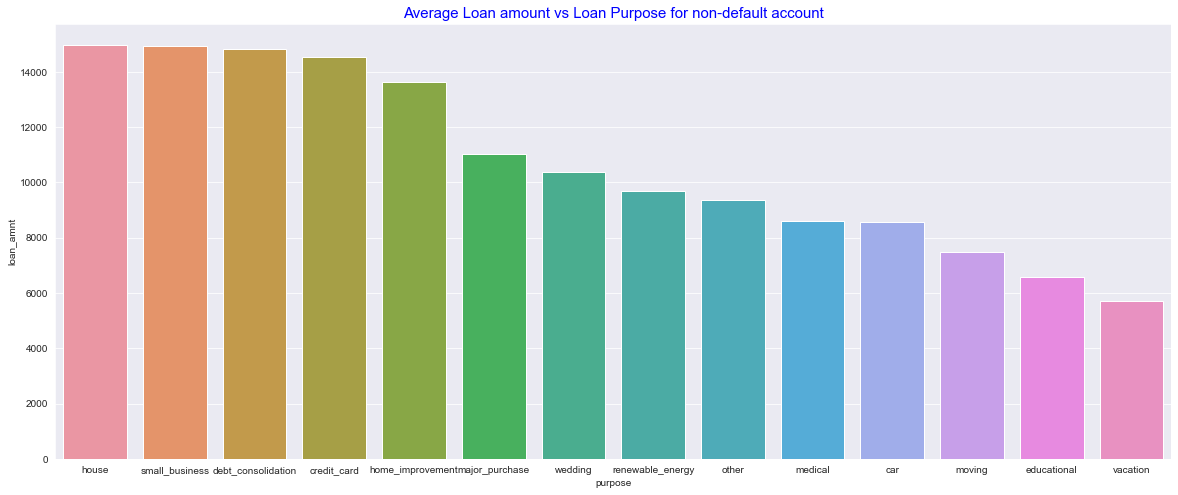

In [99]:
non_default_indi=individual_df[individual_df['target']==0]
df3=non_default_indi.groupby(['purpose'], as_index=False)['loan_amnt'].mean().sort_values('loan_amnt',ascending=False)
plt.figure(figsize=(20,8))
sns.barplot(data=df3,x='purpose',y='loan_amnt')

plt.title("Average Loan amount vs Loan Purpose for non-default account",
         fontdict={'color': 'Blue','fontsize': 15})
plt.show()

**Insights:**
1. in case of non-default account maximum average loan is sanctioned for the House. but for default account maximum average loan has been passed for small business . as housing loan is the most secured loan so thats why default cases is less than for this but business comes with lots of vurnabilities so sanctioning loan under this section is more riskier than than the housing.
2. in both the cases debt-consolidation purpose is under top 3 so sanctioning loan for this purpose needs more attention.

**2. Avg fico score vs annual income**

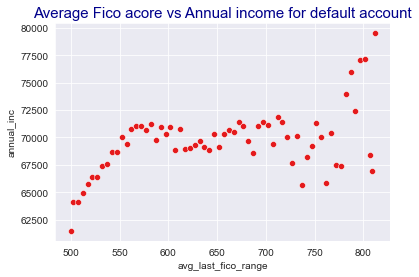

In [100]:
df=individual_df_default.groupby(['avg_last_fico_range'],as_index=False)['annual_inc'].mean()
sns.scatterplot(df.avg_last_fico_range,df.annual_inc)
plt.title("Average Fico acore vs Annual income for default account",
         fontdict={'color': 'darkblue','fontsize': 15})
plt.show()

**3 Avg Fico Score vs Loan amount**

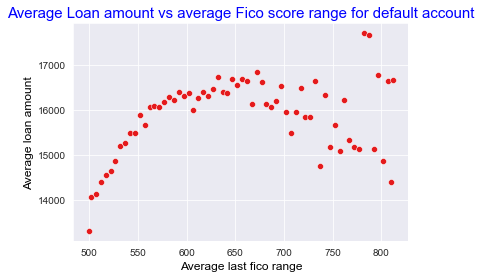

In [101]:
df=individual_df_default.groupby(['avg_last_fico_range'],as_index=False)['loan_amnt'].mean()
plt.title("Average Loan amount vs average Fico score range for default account",
         fontdict={'color': 'Blue','fontsize': 15})
sns.scatterplot(df.avg_last_fico_range,df.loan_amnt)
plt.xlabel("Average last fico range",fontdict={'color': 'black','fontsize': 12})
plt.ylabel("Average loan amount",fontdict={'color': 'black','fontsize': 12})
plt.show()

**4. dti vs loan amount**

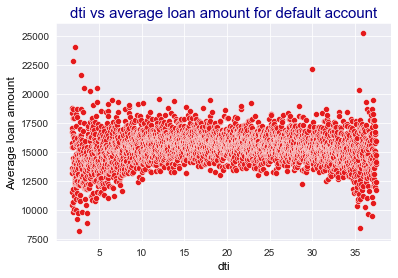

In [102]:
df=individual_df_default.groupby(['dti'],as_index=False)['loan_amnt'].mean()
sns.scatterplot(data=df,x='dti',y='loan_amnt')
plt.title("dti vs average loan amount for default account",
         fontdict={'color': 'darkblue','fontsize': 15})
plt.xlabel('dti',fontdict={'color': 'black','fontsize': 12})
plt.ylabel('Average loan amount',fontdict={'color': 'black','fontsize': 12})
plt.show()

**annual income vs FICO score**

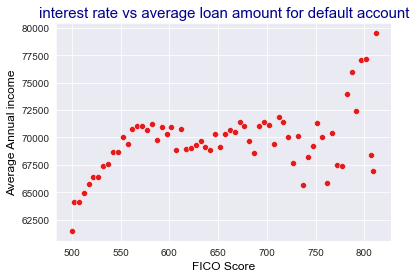

In [103]:
df=individual_df_default.groupby(['avg_last_fico_range'],as_index=False)['annual_inc'].mean()
sns.scatterplot(data=df,x='avg_last_fico_range',y='annual_inc')
plt.title("interest rate vs average loan amount for default account",
         fontdict={'color': 'darkblue','fontsize': 15})
plt.xlabel('FICO Score',fontdict={'color': 'black','fontsize': 12})
plt.ylabel('Average Annual income',fontdict={'color': 'black','fontsize': 12})
plt.show()

**Purpose vs interest rate**

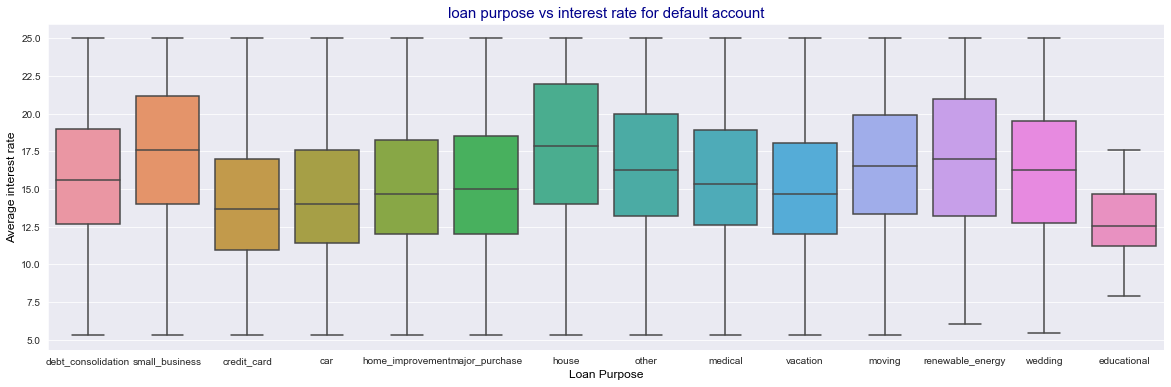

In [104]:
plt.figure(figsize=(20,6))
df=individual_df_default.groupby(['purpose'],as_index=False)['int_rate'].mean().sort_values('int_rate',ascending=False)
sns.boxplot(data=individual_df_default,x='purpose',y='int_rate')
plt.title("loan purpose vs interest rate for default account",fontdict={'color': 'darkblue','fontsize': 15})
plt.xlabel("Loan Purpose",fontdict={'color': 'black','fontsize': 12})
plt.ylabel("Average interest rate",fontdict={'color': 'black','fontsize': 12})
plt.show()

**Fico score vs interst rate**

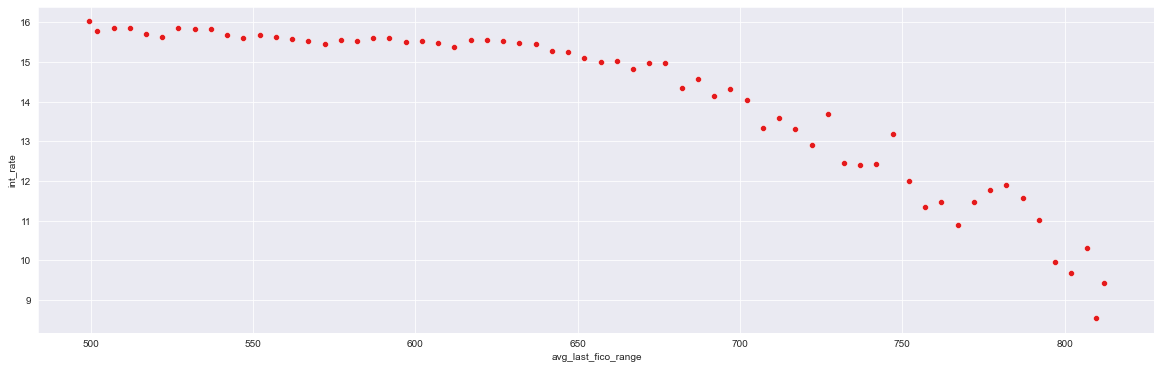

In [105]:
plt.figure(figsize=(20,6))
df=individual_df_default.groupby(['avg_last_fico_range'],as_index=False)['int_rate'].mean().sort_values('int_rate',ascending=False)
sns.scatterplot(data=df,x='avg_last_fico_range',y='int_rate')
plt.show()

**interst rate vs term**

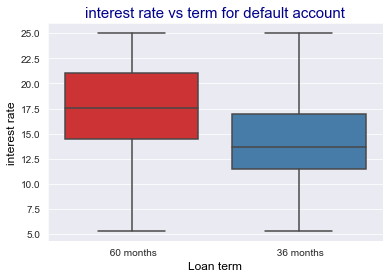

In [106]:
sns.boxplot(individual_df_default.term, individual_df_default.int_rate)

plt.title("interest rate vs term for default account",fontdict={'color': 'darkblue','fontsize': 15})
plt.xlabel("Loan term",fontdict={'color': 'black','fontsize': 12})
plt.ylabel("interest rate",fontdict={'color': 'black','fontsize': 12})
plt.show()

**verification status vs loan amount**

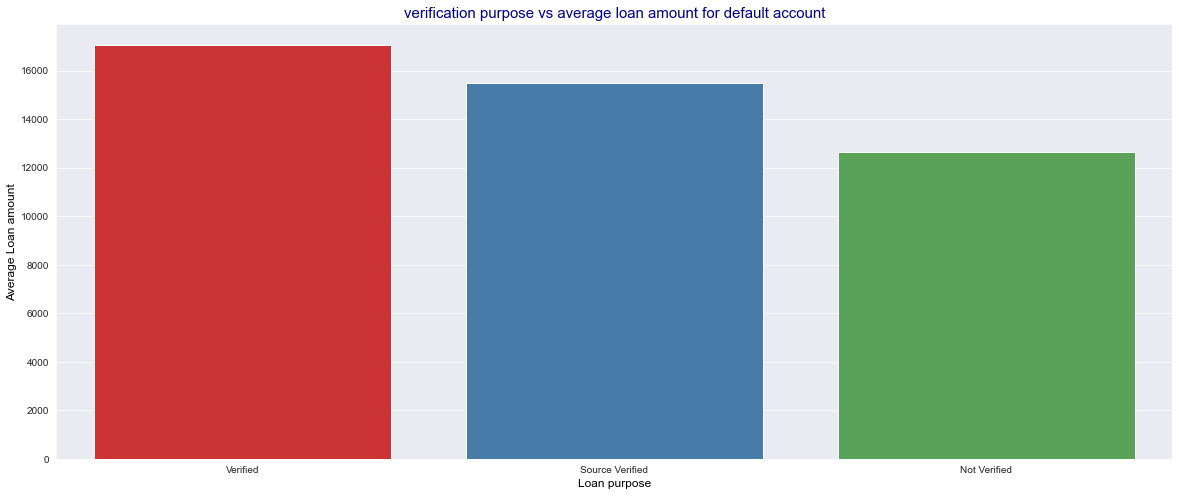

In [107]:
df3=individual_df_default.groupby(['verification_status'], as_index=False)['loan_amnt'].mean().sort_values('loan_amnt',ascending=False)
plt.figure(figsize=(20,8))
sns.barplot(data=df3,x='verification_status',y='loan_amnt')
plt.title("verification purpose vs average loan amount for default account",
         fontdict={'color': 'darkblue','fontsize': 15})
plt.xlabel("Loan purpose",fontdict={'color': 'black','fontsize': 12})
plt.ylabel("Average Loan amount",fontdict={'color': 'black','fontsize': 12})
plt.show()

**loan term vs installment**

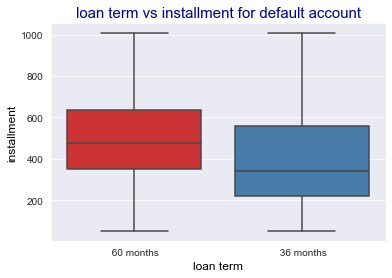

In [108]:
sns.boxplot(individual_df_default.term,individual_df_default.installment)
plt.title("loan term vs installment for default account",fontdict={'color': 'darkblue','fontsize': 15})
plt.xlabel("loan term",fontdict={'color': 'black','fontsize': 12})
plt.ylabel("installment",fontdict={'color': 'black','fontsize': 12})
plt.show()

### Multivariate Analysis

In [109]:
individual_df_multi=individual_df.copy()
individual_df_multi['target']=individual_df_multi.target.apply(lambda x: 'default' if x==1 else 'non default')

**Loan purpose vs loan amount vs target**

Text(0.5, 0, 'average loan amount')

<Figure size 720x720 with 0 Axes>

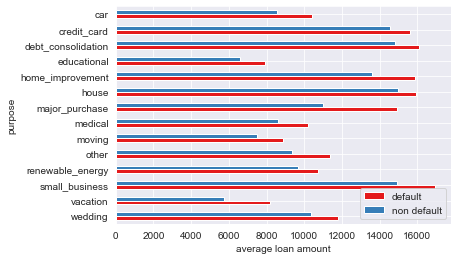

In [110]:
plt.figure(figsize=(10,10))
individual_df_multi.pivot_table(values='loan_amnt',columns=['target'],index='purpose').sort_values('purpose',ascending=False).plot.barh()
plt.legend(loc='best')
plt.xlabel('average loan amount')


**target vs home ownership**

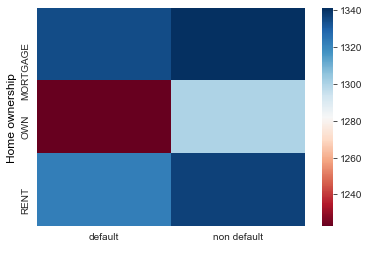

In [111]:
df=individual_df_multi.pivot_table(values='loan_amnt',columns=['target'],index='home_ownership',aggfunc=pd.Series.nunique)
#df.drop('ANY',axis=1)
df=df[df.index!='ANY']
df=df[df.index!='OTHER']
sns.heatmap(df,cmap='RdBu')
plt.xlabel(" ")
plt.ylabel("Home ownership",fontdict={'color': 'black','fontsize': 12})
plt.show()

**FICO score vs interest rate vs target**

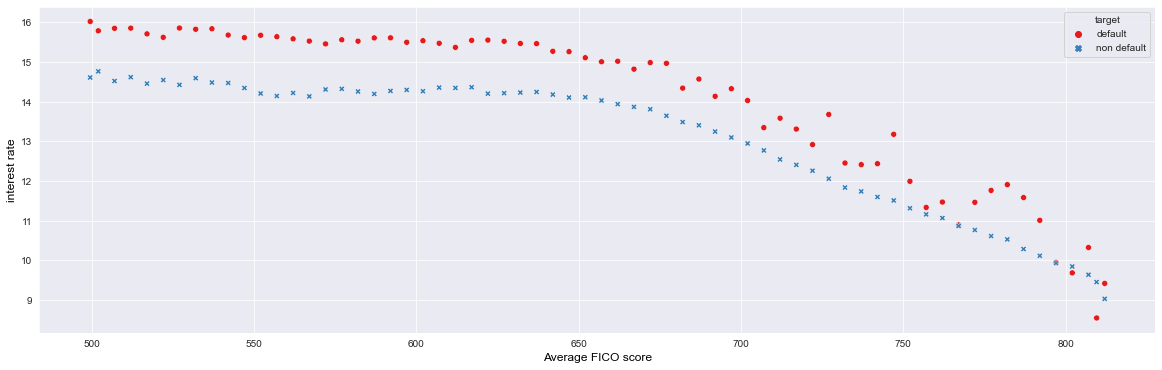

In [112]:
plt.figure(figsize=(20,6))
df=individual_df_multi.groupby(['avg_last_fico_range','target'],as_index=False)['int_rate'].mean().sort_values('int_rate',ascending=False)
sns.scatterplot(data=df,x='avg_last_fico_range',y='int_rate',hue='target',style='target')
plt.xlabel("Average FICO score",fontdict={'color': 'black','fontsize': 12})
plt.ylabel("interest rate",fontdict={'color': 'black','fontsize': 12})
plt.show()

**Verification status vs Target vs loan amount**

<AxesSubplot:ylabel='verification_status'>

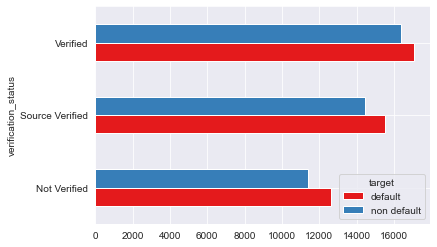

In [113]:
individual_df_multi.pivot_table(index='verification_status',columns='target',values='loan_amnt').plot.barh()

# Preprocessing for modeling

## Label encoding

**for individual dataframe**

In [114]:
individual_df.nunique().sort_values(ascending=True)

application_type                    1
pymnt_plan                          1
hardship_flag                       1
initial_list_status                 2
term                                2
target                              2
debt_settlement_flag                2
disbursement_method                 2
num_accts_ever_120_pd               3
verification_status                 3
inq_last_6mths                      3
home_ownership                      5
grade                               7
num_tl_op_past_12m                  7
mort_acc                            8
num_actv_bc_tl                     10
num_bc_sats                        10
emp_length                         11
num_rev_tl_bal_gt_0                13
acc_open_past_24mths               13
num_actv_rev_tl                    13
purpose                            14
num_op_rev_tl                      16
num_bc_tl                          17
mths_since_recent_inq              20
mo_sin_rcnt_tl                     21
num_sats    

features **application_type,hardship_flag and pymnt_plan** has only one class label so it wont help in learning so dropping these columns will help in prediction.

In [115]:
individual_df.drop(columns=['application_type','hardship_flag','pymnt_plan'],axis=1,inplace=True)
individual_df.shape

(1319544, 65)

In [116]:
categorcical_var_ind=individual_df.columns[individual_df.dtypes == 'object']
len(categorcical_var_ind)

18

In [117]:
categorcical_var_ind

Index(['term', 'grade', 'sub_grade', 'emp_title', 'emp_length',
       'home_ownership', 'verification_status', 'issue_d', 'purpose', 'title',
       'zip_code', 'addr_state', 'earliest_cr_line', 'initial_list_status',
       'last_pymnt_d', 'last_credit_pull_d', 'disbursement_method',
       'debt_settlement_flag'],
      dtype='object')

In [118]:
individual_df.debt_settlement_flag.value_counts()

N    1286858
Y      32686
Name: debt_settlement_flag, dtype: int64

In [119]:
# changing the date type feature object to datetime 
individual_df['issue_d']= pd.to_datetime(individual_df['issue_d'],errors='coerce')
individual_df['earliest_cr_line']= pd.to_datetime(individual_df['earliest_cr_line'],errors='coerce')
individual_df['last_pymnt_d']= pd.to_datetime(individual_df['last_pymnt_d'],errors='coerce')
individual_df['last_credit_pull_d']= pd.to_datetime(individual_df['last_credit_pull_d'],errors='coerce')

In [120]:
categorcical_var_ind=individual_df.columns[individual_df.dtypes == 'object']
len(categorcical_var_ind)

14

In [121]:
categorcical_var_ind=categorcical_var_ind.drop('zip_code')

In [122]:
individual_df['zip_code'] = individual_df['zip_code'].str[:2]
individual_df['zip_code']=individual_df['zip_code'].astype(int)

In [123]:
len(categorcical_var_ind)

13

In [124]:
# initiallizing label encoder object

le=LabelEncoder()

for x in categorcical_var_ind:
    individual_df[x]=le.fit_transform(individual_df[x])

    le_name_mapping = dict(zip(le.classes_, le.transform(le.classes_))) # This is to check how each variable is getting converted

In [125]:
individual_df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,purpose,title,zip_code,addr_state,dti,earliest_cr_line,inq_last_6mths,open_acc,revol_bal,revol_util,total_acc,initial_list_status,total_pymnt,total_rec_prncp,total_rec_int,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,tot_cur_bal,total_rev_hi_lim,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_inq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,disbursement_method,debt_settlement_flag,target,avg_fico_range,avg_last_fico_range
0,3600.0,0,13.99,123.03,2,13,347793,1,1,55000.0,0,2015-12-01,2,16292,19,38,5.91,2003-08-01,1.0,7.0,2765.0,29.7,13.0,1,4421.723917,3600.0,821.72,2019-01-01,122.67,2019-03-01,144904.0,9300.0,4.0,20701.0,1506.0,37.2,148.0,128.0,3.0,3.0,1.0,4.0,4.0,2.0,2.0,4.0,2.0,5.0,3.0,4.0,9.0,4.0,7.0,3.0,80.0,0.0,178050.0,7746.00,2400.0,13734.0,0,0,0,677.0,562.0
1,24700.0,0,11.99,820.28,2,10,101571,1,1,65000.0,0,2015-12-01,11,5131,57,41,16.06,1999-12-01,2.0,22.0,21470.0,19.2,38.0,1,25679.660000,24700.0,979.66,2016-06-01,926.35,2019-03-01,204396.0,73300.0,4.0,9733.0,25464.0,27.1,113.0,192.0,2.0,2.0,4.0,2.0,0.0,0.0,5.0,5.0,10.0,17.0,6.0,17.0,27.0,5.0,22.0,2.0,97.4,7.7,314017.0,39475.00,54400.0,24667.0,0,0,0,717.0,697.0
2,10400.0,1,22.45,289.91,5,25,66879,3,1,104433.0,1,2015-12-01,6,30411,17,38,25.37,1998-06-01,2.0,12.0,21929.0,64.5,35.0,1,11740.500000,10400.0,1340.50,2016-07-01,10128.96,2018-03-01,331730.0,34000.0,10.0,27644.0,4567.0,77.5,128.0,210.0,4.0,4.0,6.0,4.0,1.0,0.0,4.0,6.0,5.0,9.0,10.0,7.0,19.0,6.0,12.0,4.0,96.6,60.0,439570.0,95768.00,20300.0,88097.0,0,0,0,697.0,702.0
3,11950.0,0,13.44,405.18,2,12,312651,4,4,34000.0,1,2015-12-01,2,16292,30,10,10.20,1987-10-01,0.0,5.0,8822.0,68.4,6.0,1,13708.948530,11950.0,1758.95,2017-05-01,7653.56,2017-05-01,12798.0,12900.0,0.0,2560.0,844.0,91.0,193.0,54.0,29.0,20.0,0.0,36.0,7.0,0.0,2.0,3.0,2.0,2.0,2.0,4.0,4.0,3.0,5.0,0.0,100.0,100.0,16900.0,12798.00,9400.0,4000.0,0,0,0,692.0,757.0
4,20000.0,0,9.17,637.58,1,6,313535,1,1,156000.0,0,2015-12-01,2,16292,55,23,14.67,1990-06-01,0.0,12.0,40281.0,84.5,27.0,0,21393.800000,20000.0,1393.80,2016-11-01,15681.05,2019-03-01,360358.0,73300.0,6.0,30030.0,0.0,100.8,142.0,306.0,10.0,10.0,4.0,12.0,10.0,0.0,4.0,6.0,4.0,5.0,7.0,9.0,16.0,6.0,12.0,2.0,96.3,100.0,388852.0,113989.99,31500.0,46452.0,0,0,0,682.0,652.0


In [126]:
# converting date column to numerical

individual_df['earliest_cr_line']=individual_df['earliest_cr_line'].apply(lambda x: x.strftime('%m%Y'))
individual_df['issue_d']=individual_df['issue_d'].apply(lambda x: x.strftime('%m%Y'))
individual_df['last_pymnt_d']=individual_df['last_pymnt_d'].apply(lambda x: x.strftime('%m%Y'))
individual_df['last_credit_pull_d']=individual_df['last_credit_pull_d'].apply(lambda x: x.strftime('%m%Y'))

In [127]:
individual_df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,purpose,title,zip_code,addr_state,dti,earliest_cr_line,inq_last_6mths,open_acc,revol_bal,revol_util,total_acc,initial_list_status,total_pymnt,total_rec_prncp,total_rec_int,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,tot_cur_bal,total_rev_hi_lim,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_inq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,disbursement_method,debt_settlement_flag,target,avg_fico_range,avg_last_fico_range
0,3600.0,0,13.99,123.03,2,13,347793,1,1,55000.0,0,122015,2,16292,19,38,5.91,082003,1.0,7.0,2765.0,29.7,13.0,1,4421.723917,3600.0,821.72,012019,122.67,032019,144904.0,9300.0,4.0,20701.0,1506.0,37.2,148.0,128.0,3.0,3.0,1.0,4.0,4.0,2.0,2.0,4.0,2.0,5.0,3.0,4.0,9.0,4.0,7.0,3.0,80.0,0.0,178050.0,7746.00,2400.0,13734.0,0,0,0,677.0,562.0
1,24700.0,0,11.99,820.28,2,10,101571,1,1,65000.0,0,122015,11,5131,57,41,16.06,121999,2.0,22.0,21470.0,19.2,38.0,1,25679.660000,24700.0,979.66,062016,926.35,032019,204396.0,73300.0,4.0,9733.0,25464.0,27.1,113.0,192.0,2.0,2.0,4.0,2.0,0.0,0.0,5.0,5.0,10.0,17.0,6.0,17.0,27.0,5.0,22.0,2.0,97.4,7.7,314017.0,39475.00,54400.0,24667.0,0,0,0,717.0,697.0
2,10400.0,1,22.45,289.91,5,25,66879,3,1,104433.0,1,122015,6,30411,17,38,25.37,061998,2.0,12.0,21929.0,64.5,35.0,1,11740.500000,10400.0,1340.50,072016,10128.96,032018,331730.0,34000.0,10.0,27644.0,4567.0,77.5,128.0,210.0,4.0,4.0,6.0,4.0,1.0,0.0,4.0,6.0,5.0,9.0,10.0,7.0,19.0,6.0,12.0,4.0,96.6,60.0,439570.0,95768.00,20300.0,88097.0,0,0,0,697.0,702.0
3,11950.0,0,13.44,405.18,2,12,312651,4,4,34000.0,1,122015,2,16292,30,10,10.20,101987,0.0,5.0,8822.0,68.4,6.0,1,13708.948530,11950.0,1758.95,052017,7653.56,052017,12798.0,12900.0,0.0,2560.0,844.0,91.0,193.0,54.0,29.0,20.0,0.0,36.0,7.0,0.0,2.0,3.0,2.0,2.0,2.0,4.0,4.0,3.0,5.0,0.0,100.0,100.0,16900.0,12798.00,9400.0,4000.0,0,0,0,692.0,757.0
4,20000.0,0,9.17,637.58,1,6,313535,1,1,156000.0,0,122015,2,16292,55,23,14.67,061990,0.0,12.0,40281.0,84.5,27.0,0,21393.800000,20000.0,1393.80,112016,15681.05,032019,360358.0,73300.0,6.0,30030.0,0.0,100.8,142.0,306.0,10.0,10.0,4.0,12.0,10.0,0.0,4.0,6.0,4.0,5.0,7.0,9.0,16.0,6.0,12.0,2.0,96.3,100.0,388852.0,113989.99,31500.0,46452.0,0,0,0,682.0,652.0


**for joint dataframe**

In [128]:
joint_app_df.nunique().sort_values(ascending=True)

hardship_flag                     1
application_type                  1
pymnt_plan                        1
term                              2
target                            2
initial_list_status               2
debt_settlement_flag              2
disbursement_method               2
inq_last_6mths                    3
sec_app_inq_last_6mths            3
open_il_12m                       3
verification_status_joint         3
open_acc_6m                       3
verification_status               3
home_ownership                    4
open_rv_12m                       5
inq_fi                            6
sec_app_mort_acc                  6
open_il_24m                       6
inq_last_12m                      7
open_act_il                       7
num_tl_op_past_12m                7
sec_app_open_act_il               7
grade                             7
total_cu_tl                       8
num_actv_bc_tl                    8
mort_acc                          8
open_rv_24m                 

In [129]:
joint_app_df.drop(columns=['application_type','hardship_flag','pymnt_plan'],axis=1,inplace=True)
joint_app_df.shape

(25806, 90)

In [130]:
categorcical_var_jnt=joint_app_df.columns[joint_app_df.dtypes == 'object']
len(categorcical_var_jnt)

20

In [131]:
categorcical_var_jnt

Index(['term', 'grade', 'sub_grade', 'emp_title', 'emp_length',
       'home_ownership', 'verification_status', 'issue_d', 'purpose', 'title',
       'zip_code', 'addr_state', 'earliest_cr_line', 'initial_list_status',
       'last_pymnt_d', 'last_credit_pull_d', 'verification_status_joint',
       'sec_app_earliest_cr_line', 'disbursement_method',
       'debt_settlement_flag'],
      dtype='object')

In [132]:
# changing the date type feature object to datetime 
joint_app_df['issue_d']= pd.to_datetime(joint_app_df['issue_d'],errors='coerce')
joint_app_df['earliest_cr_line']= pd.to_datetime(joint_app_df['earliest_cr_line'],errors='coerce')
joint_app_df['last_pymnt_d']= pd.to_datetime(joint_app_df['last_pymnt_d'],errors='coerce')
joint_app_df['last_credit_pull_d']= pd.to_datetime(joint_app_df['last_credit_pull_d'],errors='coerce')
joint_app_df['sec_app_earliest_cr_line']= pd.to_datetime(joint_app_df['sec_app_earliest_cr_line'],errors='coerce')

In [133]:
categorcical_var_jnt=joint_app_df.columns[joint_app_df.dtypes == 'object']
len(categorcical_var_jnt)

15

In [134]:
categorcical_var_jnt=categorcical_var_jnt.drop('zip_code')
joint_app_df['zip_code'] = joint_app_df['zip_code'].str[:2]
joint_app_df['zip_code']=joint_app_df['zip_code'].astype(int)

In [135]:
# initiallizing label encoder object

le=LabelEncoder()

for x in categorcical_var_jnt:
    joint_app_df[x]=le.fit_transform(joint_app_df[x])

    le_name_mapping = dict(zip(le.classes_, le.transform(le.classes_))) 

In [136]:
joint_app_df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,purpose,title,zip_code,addr_state,dti,earliest_cr_line,inq_last_6mths,open_acc,revol_bal,revol_util,total_acc,initial_list_status,total_pymnt,total_rec_prncp,total_rec_int,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,annual_inc_joint,dti_joint,verification_status_joint,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_inq,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,disbursement_method,debt_settlement_flag,target,avg_fico_range,avg_last_fico_range,sec_avg_last_fico_range
0,20000.0,1,10.78,432.66,1,8,10792,1,0,63000.00,0,2015-12-01,3,3,60,13,10.78,2000-08-01,0.0,6.0,7869.0,56.2,18.0,1,22705.924294,20000.00,2705.9200,2017-06-01,15813.30,2019-03-01,71000.00,13.85,0,189699.0,0.0,1.0,0.0,4.0,19.0,10827.0,73.0,0.0,2.0,2081.0,65.0,14000.0,2.0,5.0,1.0,6.0,31617.0,2737.0,55.9,125.0,184.0,14.0,14.0,5.0,60.0,10.0,2.0,3.0,2.0,4.0,6.0,4.0,7.0,3.0,6.0,0.0,100.0,50.0,218418.0,18696.0,6200.0,14877.0,31551.0,2006-08-01,1.0,2.0,11.0,57.0,3.0,13.0,0,0,0,697.0,702.0,668.0
1,15000.0,0,11.99,498.15,2,10,4761,0,0,65000.00,1,2015-12-01,2,3,91,4,17.56,2004-08-01,0.0,9.0,13028.0,88.3,16.0,1,15183.460000,15000.00,183.4600,2016-02-01,15208.44,2016-02-01,77000.00,15.40,0,231860.0,0.0,0.0,0.0,0.0,30.0,22525.0,74.0,0.0,2.0,2839.0,78.0,14800.0,3.0,1.0,2.0,2.0,25762.0,295.0,94.2,99.0,136.0,13.0,13.0,1.0,28.0,11.0,2.0,7.0,2.0,3.0,4.0,7.0,11.0,7.0,9.0,0.0,92.3,100.0,251645.0,35553.0,5100.0,30649.0,31551.0,2006-08-01,1.0,2.0,11.0,57.0,3.0,13.0,0,0,0,667.0,767.0,668.0
2,24000.0,1,23.13,678.37,5,26,2016,6,0,43435.00,2,2015-12-01,2,3,77,42,35.70,1998-07-01,0.0,13.0,12508.0,73.1,22.0,1,27488.251245,24000.00,3488.2500,2016-09-01,417.35,2018-07-01,113314.00,25.44,0,182215.0,0.0,6.0,2.0,5.0,10.0,48582.0,75.0,0.0,1.0,5690.0,74.0,17100.0,1.0,2.0,1.0,6.0,14017.0,357.0,96.8,52.0,209.0,13.0,10.0,1.0,26.0,12.0,2.0,5.0,2.0,4.0,9.0,6.0,12.0,5.0,13.0,2.0,100.0,100.0,208064.0,61090.0,11000.0,61739.0,31551.0,2006-08-01,1.0,2.0,11.0,57.0,3.0,13.0,0,0,0,682.0,667.0,668.0
3,24000.0,1,13.44,551.50,2,12,9257,0,0,96000.00,2,2015-12-01,1,3,64,23,22.70,2001-06-01,1.0,13.0,19403.0,53.3,24.0,1,30785.080592,24000.00,6363.4475,2018-08-01,14284.88,2018-08-01,117000.00,22.76,0,220879.0,0.0,4.0,1.0,3.0,10.0,43145.0,70.0,1.0,3.0,6210.0,64.0,36400.0,2.0,0.0,5.0,7.0,16991.0,6328.0,60.9,158.0,71.0,11.0,10.0,2.0,19.0,6.0,2.0,5.0,3.0,4.0,8.0,8.0,13.0,5.0,13.0,2.0,95.7,66.7,258301.0,62548.0,16200.0,61251.0,31551.0,2006-08-01,1.0,2.0,11.0,57.0,3.0,13.0,0,0,0,677.0,707.0,668.0
4,8750.0,0,18.99,320.70,4,20,5881,0,3,29524.32,2,2015-12-01,2,3,60,13,46.71,1998-08-01,0.0,9.0,2412.0,96.5,12.0,1,7575.680000,4497.71,2153.9000,2017-09-01,320.70,2018-01-01,94348.32,17.07,0,94802.0,2.0,6.0,2.0,3.0,3.0,92313.0,89.0,0.0,1.0,1458.0,89.0,2500.0,4.0,0.0,6.0,5.0,10534.0,88.0,96.5,208.0,54.0,14.0,3.0,0.0,14.0,3.0,2.0,2.0,2.0,2.0,9.0,2.0,2.0,2.0,9.0,3.0,100.0,100.0,101994.0,94802.0,2500.0,99417.0,31551.0,2006-08-01,1.0,2.0,11.0,57.0,3.0,13.0,0,0,1,682.0,527.0,668.0


In [137]:
# converting date column to numerical

joint_app_df['earliest_cr_line']=joint_app_df['earliest_cr_line'].apply(lambda x: x.strftime('%m%Y'))
joint_app_df['issue_d']=joint_app_df['issue_d'].apply(lambda x: x.strftime('%m%Y'))
joint_app_df['last_pymnt_d']=joint_app_df['last_pymnt_d'].apply(lambda x: x.strftime('%m%Y'))
joint_app_df['last_credit_pull_d']=joint_app_df['last_credit_pull_d'].apply(lambda x: x.strftime('%m%Y'))
joint_app_df['sec_app_earliest_cr_line']=joint_app_df['sec_app_earliest_cr_line'].apply(lambda x: x.strftime('%m%Y'))

In [138]:
joint_app_df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,purpose,title,zip_code,addr_state,dti,earliest_cr_line,inq_last_6mths,open_acc,revol_bal,revol_util,total_acc,initial_list_status,total_pymnt,total_rec_prncp,total_rec_int,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,annual_inc_joint,dti_joint,verification_status_joint,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_inq,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,disbursement_method,debt_settlement_flag,target,avg_fico_range,avg_last_fico_range,sec_avg_last_fico_range
0,20000.0,1,10.78,432.66,1,8,10792,1,0,63000.00,0,122015,3,3,60,13,10.78,082000,0.0,6.0,7869.0,56.2,18.0,1,22705.924294,20000.00,2705.9200,062017,15813.30,032019,71000.00,13.85,0,189699.0,0.0,1.0,0.0,4.0,19.0,10827.0,73.0,0.0,2.0,2081.0,65.0,14000.0,2.0,5.0,1.0,6.0,31617.0,2737.0,55.9,125.0,184.0,14.0,14.0,5.0,60.0,10.0,2.0,3.0,2.0,4.0,6.0,4.0,7.0,3.0,6.0,0.0,100.0,50.0,218418.0,18696.0,6200.0,14877.0,31551.0,082006,1.0,2.0,11.0,57.0,3.0,13.0,0,0,0,697.0,702.0,668.0
1,15000.0,0,11.99,498.15,2,10,4761,0,0,65000.00,1,122015,2,3,91,4,17.56,082004,0.0,9.0,13028.0,88.3,16.0,1,15183.460000,15000.00,183.4600,022016,15208.44,022016,77000.00,15.40,0,231860.0,0.0,0.0,0.0,0.0,30.0,22525.0,74.0,0.0,2.0,2839.0,78.0,14800.0,3.0,1.0,2.0,2.0,25762.0,295.0,94.2,99.0,136.0,13.0,13.0,1.0,28.0,11.0,2.0,7.0,2.0,3.0,4.0,7.0,11.0,7.0,9.0,0.0,92.3,100.0,251645.0,35553.0,5100.0,30649.0,31551.0,082006,1.0,2.0,11.0,57.0,3.0,13.0,0,0,0,667.0,767.0,668.0
2,24000.0,1,23.13,678.37,5,26,2016,6,0,43435.00,2,122015,2,3,77,42,35.70,071998,0.0,13.0,12508.0,73.1,22.0,1,27488.251245,24000.00,3488.2500,092016,417.35,072018,113314.00,25.44,0,182215.0,0.0,6.0,2.0,5.0,10.0,48582.0,75.0,0.0,1.0,5690.0,74.0,17100.0,1.0,2.0,1.0,6.0,14017.0,357.0,96.8,52.0,209.0,13.0,10.0,1.0,26.0,12.0,2.0,5.0,2.0,4.0,9.0,6.0,12.0,5.0,13.0,2.0,100.0,100.0,208064.0,61090.0,11000.0,61739.0,31551.0,082006,1.0,2.0,11.0,57.0,3.0,13.0,0,0,0,682.0,667.0,668.0
3,24000.0,1,13.44,551.50,2,12,9257,0,0,96000.00,2,122015,1,3,64,23,22.70,062001,1.0,13.0,19403.0,53.3,24.0,1,30785.080592,24000.00,6363.4475,082018,14284.88,082018,117000.00,22.76,0,220879.0,0.0,4.0,1.0,3.0,10.0,43145.0,70.0,1.0,3.0,6210.0,64.0,36400.0,2.0,0.0,5.0,7.0,16991.0,6328.0,60.9,158.0,71.0,11.0,10.0,2.0,19.0,6.0,2.0,5.0,3.0,4.0,8.0,8.0,13.0,5.0,13.0,2.0,95.7,66.7,258301.0,62548.0,16200.0,61251.0,31551.0,082006,1.0,2.0,11.0,57.0,3.0,13.0,0,0,0,677.0,707.0,668.0
4,8750.0,0,18.99,320.70,4,20,5881,0,3,29524.32,2,122015,2,3,60,13,46.71,081998,0.0,9.0,2412.0,96.5,12.0,1,7575.680000,4497.71,2153.9000,092017,320.70,012018,94348.32,17.07,0,94802.0,2.0,6.0,2.0,3.0,3.0,92313.0,89.0,0.0,1.0,1458.0,89.0,2500.0,4.0,0.0,6.0,5.0,10534.0,88.0,96.5,208.0,54.0,14.0,3.0,0.0,14.0,3.0,2.0,2.0,2.0,2.0,9.0,2.0,2.0,2.0,9.0,3.0,100.0,100.0,101994.0,94802.0,2500.0,99417.0,31551.0,082006,1.0,2.0,11.0,57.0,3.0,13.0,0,0,1,682.0,527.0,668.0


In [139]:
joint_app_df.shape

(25806, 90)

## exporting the dataset

In [140]:
joint_app_df.to_csv('joint_app_df.csv')

In [141]:
individual_df.to_csv('individual_df.csv')

### **All categorical variable converted into numerical feature**

### **All categorical variable converted into numerical feature**

### **All categorical variable converted into numerical feature**